# CAPSTONE PROJECT

# Battle of Neighborhoods - New York vs Toronto

_by Tural Guliyev_

## Introduction/Business Problem

When comparing the cities of New York and Toronto, the first thoughts that come to mind are that the both are the largest cities in, financial and touristic capitals of their respective developed countries in North America, while also having exceedingly diverse ethnic and cultural mix, high cost of living and massive infrastructure of transportation and skyscrapers.

However, having the guidance on key differences & similarities between New York and Toronto neighborhoods still stays relevant for people when making preliminary choices between the two cities for several purposes, be it travelling, studying, working, doing business or immigrating. More explicitly, the purpose of this Capstone Project is exploring and clustering the neighborhoods of both cities and leaving the final outcome to the audience of the people as subtle reference to use for their personal decisions.

## Data Section

In this project, I have referred below data sources to achieve the comprehensive and real-world comparative analysis:

For general boroughs and neighborhoods dataset of

o Toronto: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

o New York: https://geo.nyu.edu/catalog/nyu_2451_34572

For geographical coordinates (latitudes and longitudes): Geocoder Python
For venues and places in and proximity of corresponding neighborhoods: Foursquare API https://Foursquare.com
All of the above-stated resources have been integrated within the same Jupyter Notebook, in order to achieve interactive and reliable results in the end.

## Methodology and Exploratory Analysis Section

Here I have conducted a little exporatory analysis in terms of the neighborhoods of New York vs Toronto. Initially, after getting the neighborhoods data, I used the explore section of the foursquare api to indentify the popular places and venues in each of them. Afterwards, I obtained the top 10 most common places in each neighborhood area separately in New York and Toronto and visualized them in the map to get the similarities amongst them. Later, I utilised the k-means algorithms from the scikit learn library in order to divide the cities into 5 clusters with the similar characteristics which is essentially based upon venues/places types. The visulization for both of the cities has been done through the folium library. Unsupervised learning of k-clustering has been quite useful in effective clustering process.

At the end, I have "combined" refined data of New York and Toronto in order to have a big picture, and cluster in one go. Here are the results:

## Findings, Discussion and Conclusion

At the end, I have "combined" refined data of New York and Toronto in order to have a big picture, clustered in one go, and compared the cities in graphs and plots.

The differences between the clusters can be seen from the figure; each cluster distinguishably has different distribution of common venue categories than the rest of clusters. Given the below observations, we following comments can be made:

- In 4 out of the 5 clusters, New York has dominated Toronto, in terms of both the number of venues and how widespread they are - this fact alone proves how big New York is in terms of its economy, population density and area. The exception is Cluster 3, which is close to 40% about Parks, in which one toronto can be proud of in terms of the number of these urban green-spaces. 
- In terms of the places to eat, fast food chain overall dominates this sector in both cities. However, in terms of Restaurants, Italian and Chinese ones have been the most popular if we take the most cities combined. Westmount in Toronto, and Beechhurst, Willowbrook, Queensboro and Brownsville can be exemplified among the neighborhoods with the leading number of Chinese Restaurants. On the other hand, Edgewater, Shore Acres, Olt Town in New York and Downtown in Toronto can be on the ones with Italian restaurant domination.
- Fast food places are abundant in both cities, and Pizza is the dominant sub-category, making its presence in 3 out of 5 clusters, and most dominated in Cluster 5 where the Banks are mainly located.
- Playgrounds constitute above 66% of Cluster 4, and here we can see the other venues are being grocery and convenience stores. I assume, this is because, there places are more about resting and family time. Bayswater in New york, and Scarsborough Village in Toronto are in this cluster.
- The above are among the main, but of course cannot be considered as the exchaustive list of differences observed through the analysis.


**'Concluion'**

In conslusion, I would like to state that  athough I have applied the machine learning algorithm (K-means clustering) into decision making, all of the above analysis depends on the accuracy and adequacy of Four Square API data, therefore fore more comprehensive analysis and decision-making the incorporation of further external databases and resources can be required. 

However, based on this work, I have identified the most common venues in the desired neighborhood area of the respective city. I believe, this work might help people to find a place for their purposes, whether it being for travelling or serious decisions such as building business or settling.

In [732]:
for i in range(kclusters):
    c__ = cluster_categories[i].to_frame("% of venues")
    c__.index.names = ['Category']
    html = (c__.head(7).style.set_table_styles(styles)
            .set_table_attributes('style="border-collapse: collapse; border: 2px solid #BBBBBB"'))
    display(HTML(display_format.format("Cluster {}".format(i+1))))
    display(html)

**The most common venue types in New York.**

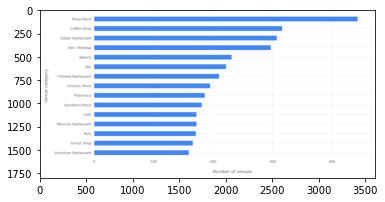

In [729]:
img = mpimg.imread('most-common-venues-New_York.png')
plt.imshow(img)

**The most common venue types in Toronto.**

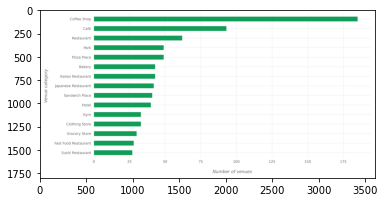

In [727]:
img = mpimg.imread('most-common-venues-Toronto.png')
plt.imshow(img)

**Below plot shows the number of New York and Toronto neighborhoods in each cluster.**

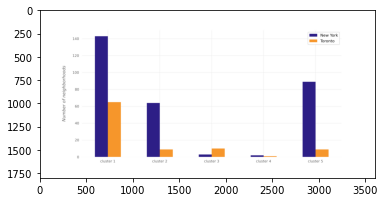

In [730]:
img = mpimg.imread('city-count.png')
plt.imshow(img) 

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [718]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from bs4 import BeautifulSoup

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.image as mpimg

from matplotlib import pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

from IPython.display import HTML
import time

print('Libraries imported.')

Libraries imported.


## 1. Downloading, Loading and Exploring Dataset for New York City

New York neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segment the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.


Luckily, this dataset exists for free on the web. Here is the link to the dataset: https://geo.nyu.edu/catalog/nyu_2451_34572


For the convenience we can download the files and place it on the server, and then simply run a wget command and access the data. So let's go ahead and do that.

In [597]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


### loading and exploring the data

Next, let's load the data.

In [598]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Let's take a quick look at the data.

In [599]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

Notice how all the relevant data is in the features key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [600]:
NY_neighborhoods_data = newyork_data['features']

We can take a look at the first item in this list.

In [601]:
NY_neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

### Tranform the data into a pandas dataframe
The next task is essentially transforming this data of nested Python dictionaries into a pandas dataframe. So let's start by creating an empty dataframe.

In [602]:
# define the dataframe columns
NY_column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
NY_neighborhoods = pd.DataFrame(columns=NY_column_names)

#Take a look at the empty dataframe to confirm that the columns are as intended.
NY_neighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

In [603]:
for data in NY_neighborhoods_data:
    NY_borough = NY_neighborhood_name = data['properties']['borough'] 
    NY_neighborhood_name = data['properties']['name']
        
    NY_neighborhood_latlon = data['geometry']['coordinates']
    NY_neighborhood_lat = NY_neighborhood_latlon[1]
    NY_neighborhood_lon = NY_neighborhood_latlon[0]
    
    NY_neighborhoods = NY_neighborhoods.append({'Borough': NY_borough,
                                          'Neighborhood': NY_neighborhood_name,
                                          'Latitude': NY_neighborhood_lat,
                                          'Longitude': NY_neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.

In [604]:
NY_neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

And make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [605]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(NY_neighborhoods['Borough'].unique()),
        NY_neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


### Use geopy library to get the latitude and longitude values of New York City.
In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent ny_explorer, as shown below.

In [606]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


### Create a map of New York with neighborhoods superimposed on top.

In [715]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, NY_neighborhood in zip(NY_neighborhoods['Latitude'], NY_neighborhoods['Longitude'], NY_neighborhoods['Borough'], NY_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(NY_neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [716]:
fig.savefig('map_newyork.png', dpi=300)

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

In [608]:
CLIENT_ID = 'G2QRRMXPA0THKBCBXR5LE351IZ252TVFMPFFFPVCUE4U2ZG1' # your Foursquare ID
CLIENT_SECRET = 'VZLT1GZCFICP00OL0LKOJIKNWCDYOLOHHFDFFHT2RTZ2DYZS' # your Foursquare Secret
VERSION = '20201226' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: HIDDEN')
print('CLIENT_SECRET: HIDDEN')

Your credentails:
CLIENT_ID: HIDDEN
CLIENT_SECRET: HIDDEN


### Let's explore the first neighborhood in our dataframe.
Get the neighborhood's name.

In [609]:
NY_neighborhoods.loc[0, 'Neighborhood']

'Wakefield'

Get the neighborhood's latitude and longitude values.

In [610]:
NY_neighborhood_latitude = NY_neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
NY_neighborhood_longitude = NY_neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

NY_neighborhood_name = NY_neighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(NY_neighborhood_name, 
                                                               NY_neighborhood_latitude, 
                                                               NY_neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


### Now, let's get the top 100 venues that are in Wakefield within a radius of 500 meters.
First, let's create the GET request URL. Name your URL **url**.

In [612]:
# type your answer here

LIMIT = 100 # limit of number of venues returned by Foursquare API


radius = 500 # define radius


# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    NY_neighborhood_latitude, 
    NY_neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=G2QRRMXPA0THKBCBXR5LE351IZ252TVFMPFFFPVCUE4U2ZG1&client_secret=VZLT1GZCFICP00OL0LKOJIKNWCDYOLOHHFDFFHT2RTZ2DYZS&v=20201226&ll=40.89470517661,-73.84720052054902&radius=500&limit=100'

Send the GET request and examine the resutls

In [613]:
NY_results = requests.get(url).json()
NY_results

{'meta': {'code': 200, 'requestId': '5fe78c4eafd2f83d5f8383b2'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Wakefield',
  'headerFullLocation': 'Wakefield, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 8,
  'suggestedBounds': {'ne': {'lat': 40.899205181110005,
    'lng': -73.84125857127495},
   'sw': {'lat': 40.89020517211, 'lng': -73.8531424698231}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c537892fd2ea593cb077a28',
       'name': 'Lollipops Gelato',
       'location': {'address': '4120 Baychester Ave',
        'crossStreet': 'Edenwald & Bussing Ave',
        'lat': 40.894123150205274,
        'lng': -73.84589162362325,
        'labeledLatLn

From the Foursquare lab in the previous module, we know that all the information is in the items key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [614]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        NY_categories_list = row['categories']
    except:
        NY_categories_list = row['venue.categories']
        
    if len(NY_categories_list) == 0:
        return None
    else:
        return NY_categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [615]:
NY_venues = NY_results['response']['groups'][0]['items']
    
NY_nearby_venues = json_normalize(NY_venues) # flatten JSON

# filter columns
NY_filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
NY_nearby_venues = NY_nearby_venues.loc[:, NY_filtered_columns]

# filter the category for each row
NY_nearby_venues['venue.categories'] = NY_nearby_venues.apply(get_category_type, axis=1)

# clean columns
NY_nearby_venues.columns = [col.split(".")[-1] for col in NY_nearby_venues.columns]

NY_nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


name      categories        lat        lng
0  Lollipops Gelato    Dessert Shop  40.894123 -73.845892
1          Rite Aid        Pharmacy  40.896649 -73.844846
2  Carvel Ice Cream  Ice Cream Shop  40.890487 -73.848568
3         Walgreens        Pharmacy  40.896528 -73.844700
4           Dunkin'      Donut Shop  40.890459 -73.849089

And how many venues were returned by Foursquare?

In [616]:
print('{} venues were returned by Foursquare.'.format(NY_nearby_venues.shape[0]))

8 venues were returned by Foursquare.


In [617]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    NY_venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        NY_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        NY_venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in NY_results])

    NY_nearby_venues = pd.DataFrame([item for NY_venue_list in NY_venues_list for item in NY_venue_list])
    NY_nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(NY_nearby_venues)

In [618]:
# type your answer here
NY_venues = getNearbyVenues(names=NY_neighborhoods['Neighborhood'],
                                   latitudes=NY_neighborhoods['Latitude'],
                                   longitudes=NY_neighborhoods['Longitude']
                                  )
print(NY_venues.shape)
NY_venues.head()

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

              Venue  Venue Latitude  Venue Longitude  Venue Category  
0  Lollipops Gelato       40.894123       -73.845892    Dessert Shop  
1          Rite Aid       40.896649       -73.844846        Pharmacy  
2  Carvel Ice Cream       40.890487       -73.848568  Ice Cream Shop  
3         Walgreens       40.896528       -73.844700        Pharmacy  
4           Dunkin'       40.890459       -73.849089      Donut Shop

### Let's check the size of the resulting dataframe

In [619]:
print(NY_venues.shape)
NY_venues.head()

(10121, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

              Venue  Venue Latitude  Venue Longitude  Venue Category  
0  Lollipops Gelato       40.894123       -73.845892    Dessert Shop  
1          Rite Aid       40.896649       -73.844846        Pharmacy  
2  Carvel Ice Cream       40.890487       -73.848568  Ice Cream Shop  
3         Walgreens       40.896528       -73.844700        Pharmacy  
4           Dunkin'       40.890459       -73.849089      Donut Shop

Let's check how many venues were returned for each neighborhood

In [620]:
NY_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Allerton                                      26                      26   
Annadale                                      10                      10   
Arden Heights                                  5                       5   
Arlington                                      5                       5   
Arrochar                                      22                      22   
Arverne                                       20                      20   
Astoria                                       98                      98   
Astoria Heights                               12                      12   
Auburndale                                    19                      19   
Bath Beach                                    48                      48   
Battery Park City                             75                      75   
Bay Ridge                                     83                      83   
Bay Terrace                                   45                      45   
Baychester                                    20                      20   
Bayside                                       72                      72   
Bayswater                                      1                       1   
Bedford Park                                  37                      37   
Bedford Stuyvesant                            28                      28   
Beechhurst                                    18                      18   
Bellaire                                      14                      14   
Belle Harbor                                  17                      17   
Bellerose                                     22                      22   
Belmont                                       98                      98   
Bensonhurst                                   28                      28   
Bergen Beach                                   6                       6   
Blissville                                    16                      16   
Bloomfield                                     4                       4   
Boerum Hill                                   94                      94   
Borough Park                                  21                      21   
Breezy Point                                   5                       5   
Briarwood                                      9                       9   
Brighton Beach                                42                      42   
Broad Channel                                  5                       5   
Broadway Junction                             15                      15   
Bronxdale                                     12                      12   
Brooklyn Heights                             100                     100   
Brookville                                     2                       2   
Brownsville                                   17                      17   
Bulls Head                                    46                      46   
Bushwick                                      73                      73   
Butler Manor                                   7                       7   
Cambria Heights                               12                      12   
Canarsie                                       4                       4   
Carnegie Hill                                 91                      91   
Carroll Gardens                              100                     100   
Castle Hill                                    7                       7   
Castleton Corners                             14                      14   
Central Harlem                                43                      43   
Charleston                                    26                      26   
Chelsea                                      105                     105   
Chinatown                                    100                     100   

### Let's find out how many unique categories can be curated from all the returned venues

In [621]:
print('There are {} uniques categories.'.format(len(NY_venues['Venue Category'].unique())))

There are 428 uniques categories.


## 3. Analyze Each Neighborhood

In [622]:
# one hot encoding
NY_onehot = pd.get_dummies(NY_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NY_onehot['Neighborhood'] = NY_venues['Neighborhood'] 

# move neighborhood column to the first column
NY_fixed_columns = [NY_onehot.columns[-1]] + list(NY_onehot.columns[:-1])
NY_onehot = NY_onehot[NY_fixed_columns]

NY_onehot.head()

Yoga Studio  Accessories Store  Adult Boutique  Afghan Restaurant  \
0            0                  0               0                  0   
1            0                  0               0                  0   
2            0                  0               0                  0   
3            0                  0               0                  0   
4            0                  0               0                  0   

   African Restaurant  American Restaurant  Animal Shelter  Antique Shop  \
0                   0                    0               0             0   
1                   0                    0               0             0   
2                   0                    0               0             0   
3                   0                    0               0             0   
4                   0                    0               0             0   

   Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0       0                 0                       0            0           0   
1       0                 0                       0            0           0   
2       0                 0                       0            0           0   
3       0                 0                       0            0           0   
4       0                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auditorium  Australian Restaurant  Austrian Restaurant  \
0                   0           0                      0                    0   
1                   0           0                      0                    0   
2                   0           0                      0                    0   
3                   0           0                      0                    0   
4                   0           0                      0                    0   

   Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0              0                0          0           0           0       0   
1              0                0          0           0           0       0   
2              0                0          0           0           0       0   
3              0                0          0           0           0       0   
4              0                0          0           0           0       0   

   Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  Bath House  \
0     0    0               0                 0                 0           0   
1     0    0               0                 0                 0           0   
2     0    0               0                 0                 0           0   
3     0    0               0                 0                 0           0   
4     0    0               0                 0                 0           0   

   Beach  Beach Bar  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0      0          0                0         0            0           0   
1      0          0                0         0            0           0   
2      0          0                0         0            0           0   
3      0          0                0         0            0           0   
4      0          0                0         0            0           0   

   Big Box Store  Bike Rental / Bike Share  Bike Shop  Bike Trail  Bistro  \
0              0                         0          0           0       0   
1              0                         0          0           0       0   
2              0                         0          0           0       0   
3              0           

And let's examine the new dataframe size.

In [623]:
NY_onehot.shape

(10121, 428)

### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [624]:
NY_grouped = NY_onehot.groupby('Neighborhood').mean().reset_index()
NY_grouped.head()

Neighborhood  Yoga Studio  Accessories Store  Adult Boutique  \
0       Allerton          0.0                0.0             0.0   
1       Annadale          0.0                0.0             0.0   
2  Arden Heights          0.0                0.0             0.0   
3      Arlington          0.0                0.0             0.0   
4       Arrochar          0.0                0.0             0.0   

   Afghan Restaurant  African Restaurant  American Restaurant  Animal Shelter  \
0                0.0                 0.0                  0.0             0.0   
1                0.0                 0.0                  0.1             0.0   
2                0.0                 0.0                  0.0             0.0   
3                0.0                 0.0                  0.2             0.0   
4                0.0                 0.0                  0.0             0.0   

   Antique Shop  Arcade  Arepa Restaurant  Argentinian Restaurant  \
0           0.0     0.0               0.0                     0.0   
1           0.0     0.0               0.0                     0.0   
2           0.0     0.0               0.0                     0.0   
3           0.0     0.2               0.0                     0.0   
4           0.0     0.0               0.0                     0.0   

   Art Gallery  Art Museum  Arts & Crafts Store  Arts & Entertainment  \
0          0.0         0.0                  0.0                   0.0   
1          0.0         0.0                  0.0                   0.0   
2          0.0         0.0                  0.0                   0.0   
3          0.0         0.0                  0.0                   0.0   
4          0.0         0.0                  0.0                   0.0   

   Asian Restaurant  Athletics & Sports  Auditorium  Australian Restaurant  \
0               0.0            0.000000         0.0                    0.0   
1               0.0            0.000000         0.0                    0.0   
2               0.0            0.000000         0.0                    0.0   
3               0.0            0.000000         0.0                    0.0   
4               0.0            0.045455         0.0                    0.0   

   Austrian Restaurant  Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  \
0                  0.0            0.0              0.0        0.0         0.0   
1                  0.0            0.0              0.0        0.0         0.0   
2                  0.0            0.0              0.0        0.0         0.0   
3                  0.0            0.0              0.0        0.0         0.0   
4                  0.0            0.0              0.0        0.0         0.0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0    0.000000     0.0   0.0  0.0             0.0               0.0   
1    0.000000     0.0   0.0  0.0             0.0               0.0   
2    0.000000     0.0   0.0  0.0             0.0               0.0   
3    0.000000     0.0   0.0  0.0             0.0               0.0   
4    0.045455     0.0   0.0  0.0             0.0               0.0   

   Basketball Court  Bath House  Beach  Beach Bar  Bed & Breakfast  Beer Bar  \
0               0.0         0.0    0.0        0.0              0.0       0.0   
1               0.0         0.0    0.0        0.0              0.0       0.0   
2               0.0         0.0    0.0        0.0              0.0       0.0   
3               0.0         0.0    0.0        0.0              0.0       0.0   
4               0.0         0.0    0.0        0.0              0.0       0.0   

   Beer Garden  Beer Store  Big Box Store  Bike Rental / Bike Share  \
0          0.0         0.0            0.0                       0.0   
1          0.0         0.0            0.0                       0.0   
2          0.0         0.0            0.0                       0.0   
3          0.0         0.0            0.0                       0.0   
4          0.0         0.0            0.0

### Let's confirm the new size

In [625]:
NY_grouped.shape

(301, 428)

### Let's print each neighborhood along with the top 10 most common venues

In [626]:
num_top_venues = 10

for hood in NY_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = NY_grouped[NY_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
                   venue  freq
0            Pizza Place  0.19
1          Deli / Bodega  0.12
2            Supermarket  0.08
3       Department Store  0.04
4           Intersection  0.04
5   Fast Food Restaurant  0.04
6     Chinese Restaurant  0.04
7            Gas Station  0.04
8  Check Cashing Service  0.04
9             Playground  0.04


----Annadale----
                 venue  freq
0          Pizza Place   0.2
1             Pharmacy   0.1
2           Restaurant   0.1
3                 Food   0.1
4                 Park   0.1
5        Train Station   0.1
6                Diner   0.1
7  American Restaurant   0.1
8         Dance Studio   0.1
9  Peruvian Restaurant   0.0


----Arden Heights----
                  venue  freq
0              Pharmacy   0.2
1         Deli / Bodega   0.2
2           Coffee Shop   0.2
3              Bus Stop   0.2
4           Pizza Place   0.2
5  Pakistani Restaurant   0.0
6           Pet Service   0.0
7              Pet Café   0.0
8   Peruvi

### Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [627]:
def return_most_common_venues_NY(row, num_top_venues):
    NY_row_categories = row.iloc[1:]
    NY_row_categories_sorted = NY_row_categories.sort_values(ascending=False)
    
    return NY_row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [628]:
num_top_venues = 10

NY_indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
NY_columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        NY_columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        NY_columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
NY_neighborhoods_venues_sorted = pd.DataFrame(columns=NY_columns)
NY_neighborhoods_venues_sorted['Neighborhood'] = NY_grouped['Neighborhood']

for ind in np.arange(NY_grouped.shape[0]):
    NY_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues_NY(NY_grouped.iloc[ind, :], num_top_venues)

NY_neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       Allerton           Pizza Place         Deli / Bodega   
1       Annadale           Pizza Place   American Restaurant   
2  Arden Heights         Deli / Bodega              Pharmacy   
3      Arlington         Deli / Bodega   American Restaurant   
4       Arrochar              Bus Stop    Italian Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Supermarket   Fried Chicken Joint            Playground   
1         Train Station                 Diner                  Food   
2           Coffee Shop              Bus Stop           Pizza Place   
3                Arcade              Bus Stop        Scenic Lookout   
4           Pizza Place         Deli / Bodega           Supermarket   

   6th Most Common Venue      7th Most Common Venue     8th Most Common Venue  \
0     Chinese Restaurant       Fast Food Restaurant       Martial Arts School   
1             Restaurant                   Pharmacy                      Park   
2          Women's Store                      Field             Event Service   
3          Women's Store          Fish & Chips Shop               Event Space   
4  Outdoors & Recreation  Middle Eastern Restaurant  Mediterranean Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0     Electronics Store               Pharmacy  
1          Dance Studio                Exhibit  
2           Event Space                Exhibit  
3               Exhibit                Factory  
4              Pharmacy             Bagel Shop

## 4. Cluster Neighborhoods
Run k-means to cluster the neighborhood into 5 clusters.

In [629]:
# set number of clusters
kclusters = 5

NY_grouped_clustering = NY_grouped.drop('Neighborhood', 1)

# run k-means clustering
NY_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NY_grouped_clustering)

# check cluster labels generated for each row in the dataframe
NY_kmeans.labels_[0:10] 

array([1, 0, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [630]:
# add clustering labels
NY_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', NY_kmeans.labels_)

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
NY_merged = NY_neighborhoods.join(NY_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

NY_merged.head() # check the last columns!

Borough Neighborhood   Latitude  Longitude  Cluster Labels  \
0   Bronx    Wakefield  40.894705 -73.847201             2.0   
1   Bronx   Co-op City  40.874294 -73.829939             2.0   
2   Bronx  Eastchester  40.887556 -73.827806             1.0   
3   Bronx    Fieldston  40.895437 -73.905643             2.0   
4   Bronx    Riverdale  40.890834 -73.912585             2.0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0              Pharmacy           Gas Station            Donut Shop   
1                  Park            Restaurant                 Trail   
2         Deli / Bodega  Caribbean Restaurant           Bus Station   
3                 Plaza                 River           Bus Station   
4           Bus Station                  Park                  Bank   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0            Laundromat        Ice Cream Shop          Dessert Shop   
1              Pharmacy           Pizza Place            Bagel Shop   
2                 Diner     Food & Drink Shop    Seafood Restaurant   
3      Business Service     Fish & Chips Shop         Event Service   
4                   Gym          Home Service                 Plaza   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0        Sandwich Place               Exhibit               Factory   
1         Grocery Store        Discount Store  Fast Food Restaurant   
2  Fast Food Restaurant            Donut Shop         Metro Station   
3           Event Space               Exhibit               Factory   
4            Playground            Food Truck     Food & Drink Shop   

  10th Most Common Venue  
0                  Field  
1            Bus Station  
2               Platform  
3     Falafel Restaurant  
4                   Food

Finally, let's visualize the resulting clusters

In [631]:
# create map
NY_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NY_merged['Latitude'], NY_merged['Longitude'], NY_merged['Neighborhood'], NY_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(NY_map_clusters)
       
NY_map_clusters

TypeError: list indices must be integers or slices, not float

## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

### Cluster 1

In [632]:
NY_merged.loc[NY_merged['Cluster Labels'] == 0, NY_merged.columns[[1] + list(range(5, NY_merged.shape[1]))]]

Neighborhood       1st Most Common Venue 2nd Most Common Venue  \
40    Castle Hill                        Bank        Cosmetics Shop   
215      Annadale                 Pizza Place   American Restaurant   
242    Greenridge            Asian Restaurant            Bagel Shop   
255  Emerson Hill  Construction & Landscaping                  Food   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
40               Pharmacy                Market                  Park   
215         Train Station                 Diner                  Food   
242                 Diner           Pizza Place                Lawyer   
255         Women's Store   Filipino Restaurant  Ethiopian Restaurant   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
40                  Diner           Pizza Place                 Field   
215            Restaurant              Pharmacy                  Park   
242         Women's Store         Event Service           Event Space   
255         Event Service           Event Space               Exhibit   

    9th Most Common Venue 10th Most Common Venue  
40          Event Service            Event Space  
215          Dance Studio                Exhibit  
242               Exhibit                Factory  
255               Factory     Falafel Restaurant

### Cluster 2

In [633]:
NY_merged.loc[NY_merged['Cluster Labels'] == 1, NY_merged.columns[[1] + list(range(5, NY_merged.shape[1]))]]

Neighborhood      1st Most Common Venue   2nd Most Common Venue  \
2         Eastchester              Deli / Bodega    Caribbean Restaurant   
7            Woodlawn              Deli / Bodega                     Pub   
8             Norwood                Pizza Place                    Park   
15     Morris Heights              Grocery Store           Deli / Bodega   
17       East Tremont                Pizza Place          Cosmetics Shop   
32           Van Nest              Deli / Bodega             Pizza Place   
33        Morris Park                Pizza Place           Deli / Bodega   
43          Concourse              Deli / Bodega             Bus Station   
72      East New York        Fried Chicken Joint             Pizza Place   
80       Borough Park                       Bank    Fast Food Restaurant   
83        Marine Park                Pizza Place      Athletics & Sports   
89         Ocean Hill              Deli / Bodega      Chinese Restaurant   
92            Midwood                Pizza Place                  Bakery   
144          Glendale                Pizza Place     Arts & Crafts Store   
146         Woodhaven              Deli / Bodega                    Bank   
150        Whitestone            Bubble Tea Shop            Dance Studio   
154        Douglaston              Deli / Bodega                    Bank   
156         Bellerose              Deli / Bodega      Italian Restaurant   
170      Far Rockaway              Deli / Bodega             Pizza Place   
171     Broad Channel              Deli / Bodega     Sporting Goods Shop   
193        Brookville              Deli / Bodega                  Market   
195      North Corona              Deli / Bodega             Pizza Place   
198      New Brighton                   Bus Stop           Deli / Bodega   
202       Grymes Hill              Deli / Bodega     American Restaurant   
204       South Beach                       Pier           Deli / Bodega   
205     Port Richmond                Pizza Place     Rental Car Location   
206  Mariner's Harbor         Italian Restaurant           Deli / Bodega   
217       Tottenville         Italian Restaurant  Thrift / Vintage Store   
218     Tompkinsville                Pizza Place                 Brewery   
227         Arlington              Deli / Bodega     American Restaurant   
228          Arrochar                   Bus Stop      Italian Restaurant   
231      Dongan Hills              Deli / Bodega      Italian Restaurant   
234    New Dorp Beach         Italian Restaurant           Deli / Bodega   
240         Rossville                 Bagel Shop             Pizza Place   
241     Arden Heights              Deli / Bodega                Pharmacy   
252       Shore Acres              Deli / Bodega      Italian Restaurant   
258          Elm Park              Deli / Bodega             Pizza Place   
264            Utopia              Deli / Bodega             Pizza Place   
285       Willowbrook                   Bus Stop      Chinese Restaurant   
286      Sandy Ground               Home Service                Bus Stop   
288           Roxbury              Deli / Bodega               Irish Pub   
295     Highland Park  Latin American Restaurant           Deli / Bodega   
296           Madison                 Bagel Shop      Chinese Restaurant   
298          Allerton                Pizza Place           Deli / Bodega   
305         Fox Hills              Deli / Bodega     American Restaurant   

         3rd Most Common Venue       4th Most Common Venue  \
2                  Bus Station                       Diner   
7                  Pizza Place                  Playground   
8                         Bank               Deli / Bodega   
15           Recreation Center                 Pizza Place   
17     Puerto Rican Restaurant                 Supermarket   
32   Middle Eastern Restaurant                  Donut Shop   
33                      Bakery                Burger Joint   
43              

### Cluster 3

In [634]:
NY_merged.loc[NY_merged['Cluster Labels'] == 2, NY_merged.columns[[1] + list(range(5, NY_merged.shape[1]))]]

Neighborhood      1st Most Common Venue  \
0                    Wakefield                   Pharmacy   
1                   Co-op City                       Park   
3                    Fieldston                      Plaza   
4                    Riverdale                Bus Station   
5                  Kingsbridge                Pizza Place   
6                  Marble Hill                        Gym   
9               Williamsbridge                        Bar   
10                  Baychester                 Donut Shop   
11              Pelham Parkway         Italian Restaurant   
12                 City Island     Thrift / Vintage Store   
13                Bedford Park                      Diner   
14          University Heights                Pizza Place   
16                     Fordham          Mobile Phone Shop   
18                  West Farms                Bus Station   
19                High  Bridge         Chinese Restaurant   
20                     Melrose                   Pharmacy   
21                  Mott Haven                        Gym   
22                 Port Morris     Furniture / Home Store   
23                    Longwood             Sandwich Place   
24                 Hunts Point                Pizza Place   
25                  Morrisania                Bus Station   
26                   Soundview         Chinese Restaurant   
27                Clason Point                       Park   
28                 Throgs Neck                Coffee Shop   
29                Country Club             Sandwich Place   
30                 Parkchester                Supermarket   
31          Westchester Square       Fast Food Restaurant   
34                     Belmont         Italian Restaurant   
35              Spuyten Duyvil                       Park   
36             North Riverdale                Pizza Place   
37                  Pelham Bay         Italian Restaurant   
38               Schuylerville                      Diner   
39              Edgewater Park         Italian Restaurant   
41                   Olinville         Chinese Restaurant   
42              Pelham Gardens                Bus Station   
44                   Unionport             Ice Cream Shop   
45                    Edenwald                 Playground   
46                   Bay Ridge                        Spa   
47                 Bensonhurst         Chinese Restaurant   
48                 Sunset Park                     Bakery   
49                  Greenpoint                        Bar   
50                   Gravesend                Pizza Place   
51              Brighton Beach                 Restaurant   
52              Sheepshead Bay               Dessert Shop   
53           Manhattan Terrace                Pizza Place   
54                    Flatbush                   Pharmacy   
55               Crown Heights                Pizza Place   
56               East Flatbush         Chinese Restaurant   
57                  Kensington              Grocery Store   
58             Windsor Terrace              Deli / Bodega   
59            Prospect Heights                        Bar   
60                 Brownsville              Moving Target   
61                Williamsburg                Coffee Shop   
62                    Bushwick                        Bar   
63          Bedford Stuyvesant                Coffee Shop   
64            Brooklyn Heights              Deli / Bodega   
65                 Cobble Hill               Cocktail Bar   
66             Carroll Gardens         Italian Restaurant   
67                    Red Hook         Seafood Restaurant   
68                     Gowanus                        Bar   
69                 Fort Greene         Italian Restaurant   
70                  Park Slope                Coffee Shop   
71               Cypress Hills  Latin American Restaurant   
73               Starrett City                   Pharmacy   
74                    Canarsie            Thai Restau

### Cluster 4

In [635]:
NY_merged.loc[NY_merged['Cluster Labels'] == 3, NY_merged.columns[[1] + list(range(5, NY_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
192   Somerville                  Park         Women's Store   
203    Todt Hill                  Park         Women's Store   

     3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
192  Entertainment Service         Event Service           Event Space   
203  Entertainment Service         Event Service           Event Space   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
192               Exhibit               Factory    Falafel Restaurant   
203               Exhibit               Factory    Falafel Restaurant   

    9th Most Common Venue 10th Most Common Venue  
192                  Farm         Farmers Market  
203                  Farm         Farmers Market

### Cluster 5

In [636]:
NY_merged.loc[NY_merged['Cluster Labels'] == 4, NY_merged.columns[[1] + list(range(5, NY_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
172  Breezy Point                 Beach   Monument / Landmark   
179      Neponsit                 Beach         Women's Store   
302       Hammels                 Beach   Fried Chicken Joint   

    3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  \
172                 Trail  Entertainment Service         Event Service   
179     Fish & Chips Shop          Event Service           Event Space   
302  Gym / Fitness Center   Fast Food Restaurant               Dog Run   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
172           Event Space               Exhibit               Factory   
179               Exhibit               Factory    Falafel Restaurant   
302              Bus Stop                 Diner           Bus Station   

    9th Most Common Venue 10th Most Common Venue  
172    Falafel Restaurant                   Farm  
179                  Farm         Farmers Market  
302            Food Truck             Shoe Store

In [637]:
TO_WIKI_URL = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

TO_data_extraction = requests.get(WIKI_URL).text
TO_neighborhood_dataframe = BeautifulSoup(data_extraction, 'lxml')

TO_table1 = pd.read_html(WIKI_URL, header=0, flavor='bs4')
TO_table1a = table1[0]
TO_table1a

Postal Code           Borough  \
0           M1A      Not assigned   
1           M2A      Not assigned   
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
5           M6A        North York   
6           M7A  Downtown Toronto   
7           M8A      Not assigned   
8           M9A         Etobicoke   
9           M1B       Scarborough   
10          M2B      Not assigned   
11          M3B        North York   
12          M4B         East York   
13          M5B  Downtown Toronto   
14          M6B        North York   
15          M7B      Not assigned   
16          M8B      Not assigned   
17          M9B         Etobicoke   
18          M1C       Scarborough   
19          M2C      Not assigned   
20          M3C        North York   
21          M4C         East York   
22          M5C  Downtown Toronto   
23          M6C              York   
24          M7C      Not assigned   
25          M8C      Not assigned   
26          M9C         Etobicoke   
27          M1E       Scarborough   
28          M2E      Not assigned   
29          M3E      Not assigned   
30          M4E      East Toronto   
31          M5E  Downtown Toronto   
32          M6E              York   
33          M7E      Not assigned   
34          M8E      Not assigned   
35          M9E      Not assigned   
36          M1G       Scarborough   
37          M2G      Not assigned   
38          M3G      Not assigned   
39          M4G         East York   
40          M5G  Downtown Toronto   
41          M6G  Downtown Toronto   
42          M7G      Not assigned   
43          M8G      Not assigned   
44          M9G      Not assigned   
45          M1H       Scarborough   
46          M2H        North York   
47          M3H        North York   
48          M4H         East York   
49          M5H  Downtown Toronto   
50          M6H      West Toronto   
51          M7H      Not assigned   
52          M8H      Not assigned   
53          M9H      Not assigned   
54          M1J       Scarborough   
55          M2J        North York   
56          M3J        North York   
57          M4J         East York   
58          M5J  Downtown Toronto   
59          M6J      West Toronto   
60          M7J      Not assigned   
61          M8J      Not assigned   
62          M9J      Not assigned   
63          M1K       Scarborough   
64          M2K        North York   
65          M3K        North York   
66          M4K      East Toronto   
67          M5K  Downtown Toronto   
68          M6K      West Toronto   
69          M7K      Not assigned   
70          M8K      Not assigned   
71          M9K      Not assigned   
72          M1L       Scarborough   
73          M2L        North York   
74          M3L        North York   
75          M4L      East Toronto   
76          M5L  Downtown Toronto   
77          M6L        North York   
78          M7L      Not assigned   
79          M8L      Not assigned   
80          M9L        North York   
81          M1M       Scarborough   
82          M2M        North York   
83          M3M        North York   
84          M4M      East Toronto   
85          M5M        North York   
86          M6M              York   
87          M7M      Not assigned   
88          M8M      Not assigned   
89          M9M        North York   
90          M1N       Scarborough   
91          M2N        North York   
92          M3N        North York   
93          M4N   Central Toronto   
94          M5N   Central Toronto   
95          M6N              York   
96          M7N      Not assigned   
97          M8N      Not assigned   
98          M9N              York   
99          M1P       Scarborough   
100         M2P        North York   
101         M3P      Not assigned   
102         M4P   Central Toronto   
103         M5P   Central Toronto   
104         M6P      West Toronto   
105         M7P      Not assigned   
106         M8P      Not assigned   
107     

In [638]:
#use the .shape method to print the number of rows in the dataframe
TO_table1a.shape

(180, 3)

In [639]:
# Ignore cells with a borough that is "Not assigned". Therefore, we need to opt solely the data where column Borough doesn't have "not assigned" value.
TO_table1b = TO_table1a[TO_table1a['Borough'] != 'Not assigned'].reset_index(drop=True)
TO_table1b

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
34          M3J        North York   
35          M4J         East York   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
56          M6M              York   
57          M9M        North York   
58          M1N       Scarborough   
59          M2N        North York   
60          M3N        North York   
61          M4N   Central Toronto   
62          M5N   Central Toronto   
63          M6N              York   
64          M9N              York   
65          M1P       Scarborough   
66          M2P        North York   
67          M4P   Central Toronto   
68          M5P   Central Toronto   
69          M6P      West Toronto   
70          M9P         Etobicoke   
71          M1R       Scarborough   
72          M2R        North York   
73          M4R   Central Toronto   
74          M5R   Central Toronto   
75          M6R      West Toronto   
76          M7R       Mississauga   
77          M9R         Etobicoke   
78          M1S       Scarborough   
79          M4S   Central Toronto   
80          M5S  Downtown Toronto   
81          M6S      West Toronto   
82          M1T       Scarborough   
83          M4T   Central Toronto   
84          M5T  Downtown Toronto   
85          M1V       Scarborough   
86          M4V   Central Toronto   
87          M5V  Downtown Toronto   
88          M8V         Etobicoke   
89          M9V         Etobicoke   
90          M1W       Scarborough   
91          M4W  Downtown Toronto   
92          M5W  Downtown Toronto   
93          M8W         Etobicoke   
94          M9W         Etobicoke   
95          M1X       Scarborough   
96          M4X  Downtown Toronto   
97          M5X  Downtown Toronto   
98          M8X         Etobicoke   
99          M4Y  Downtown Toronto   
100         M7Y      East Toronto   
101         M8Y         Etobicoke   
102         M8Z         Etobicoke   

                                         Neighbourhood  
0                                            Parkwoods  
1                                     Vic

In [640]:
#  If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. Therefore, we need to replace "not assigned" values in Neighbourhood column with Borough values in the same row.

TO_table1b.loc[TO_table1b['Neighbourhood'] == 'Not assigned']
TO_table1b.Neighbourhood.replace('Not assigned',TO_table1b['Borough'],inplace=True)
TO_table1b

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
34          M3J        North York   
35          M4J         East York   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
56          M6M              York   
57          M9M        North York   
58          M1N       Scarborough   
59          M2N        North York   
60          M3N        North York   
61          M4N   Central Toronto   
62          M5N   Central Toronto   
63          M6N              York   
64          M9N              York   
65          M1P       Scarborough   
66          M2P        North York   
67          M4P   Central Toronto   
68          M5P   Central Toronto   
69          M6P      West Toronto   
70          M9P         Etobicoke   
71          M1R       Scarborough   
72          M2R        North York   
73          M4R   Central Toronto   
74          M5R   Central Toronto   
75          M6R      West Toronto   
76          M7R       Mississauga   
77          M9R         Etobicoke   
78          M1S       Scarborough   
79          M4S   Central Toronto   
80          M5S  Downtown Toronto   
81          M6S      West Toronto   
82          M1T       Scarborough   
83          M4T   Central Toronto   
84          M5T  Downtown Toronto   
85          M1V       Scarborough   
86          M4V   Central Toronto   
87          M5V  Downtown Toronto   
88          M8V         Etobicoke   
89          M9V         Etobicoke   
90          M1W       Scarborough   
91          M4W  Downtown Toronto   
92          M5W  Downtown Toronto   
93          M8W         Etobicoke   
94          M9W         Etobicoke   
95          M1X       Scarborough   
96          M4X  Downtown Toronto   
97          M5X  Downtown Toronto   
98          M8X         Etobicoke   
99          M4Y  Downtown Toronto   
100         M7Y      East Toronto   
101         M8Y         Etobicoke   
102         M8Z         Etobicoke   

                                         Neighbourhood  
0                                            Parkwoods  
1                                     Vic

In [641]:
#use the .shape method to print the number of rows in the dataframe
TO_table1b.shape

(103, 3)

In [642]:
TO_table1c = TO_table1b.rename({'Postal Code': 'PostalCode', 'Neighbourhood': 'Neighborhood' }, axis=1)
TO_table1c

PostalCode           Borough  \
0          M3A        North York   
1          M4A        North York   
2          M5A  Downtown Toronto   
3          M6A        North York   
4          M7A  Downtown Toronto   
5          M9A         Etobicoke   
6          M1B       Scarborough   
7          M3B        North York   
8          M4B         East York   
9          M5B  Downtown Toronto   
10         M6B        North York   
11         M9B         Etobicoke   
12         M1C       Scarborough   
13         M3C        North York   
14         M4C         East York   
15         M5C  Downtown Toronto   
16         M6C              York   
17         M9C         Etobicoke   
18         M1E       Scarborough   
19         M4E      East Toronto   
20         M5E  Downtown Toronto   
21         M6E              York   
22         M1G       Scarborough   
23         M4G         East York   
24         M5G  Downtown Toronto   
25         M6G  Downtown Toronto   
26         M1H       Scarborough   
27         M2H        North York   
28         M3H        North York   
29         M4H         East York   
30         M5H  Downtown Toronto   
31         M6H      West Toronto   
32         M1J       Scarborough   
33         M2J        North York   
34         M3J        North York   
35         M4J         East York   
36         M5J  Downtown Toronto   
37         M6J      West Toronto   
38         M1K       Scarborough   
39         M2K        North York   
40         M3K        North York   
41         M4K      East Toronto   
42         M5K  Downtown Toronto   
43         M6K      West Toronto   
44         M1L       Scarborough   
45         M2L        North York   
46         M3L        North York   
47         M4L      East Toronto   
48         M5L  Downtown Toronto   
49         M6L        North York   
50         M9L        North York   
51         M1M       Scarborough   
52         M2M        North York   
53         M3M        North York   
54         M4M      East Toronto   
55         M5M        North York   
56         M6M              York   
57         M9M        North York   
58         M1N       Scarborough   
59         M2N        North York   
60         M3N        North York   
61         M4N   Central Toronto   
62         M5N   Central Toronto   
63         M6N              York   
64         M9N              York   
65         M1P       Scarborough   
66         M2P        North York   
67         M4P   Central Toronto   
68         M5P   Central Toronto   
69         M6P      West Toronto   
70         M9P         Etobicoke   
71         M1R       Scarborough   
72         M2R        North York   
73         M4R   Central Toronto   
74         M5R   Central Toronto   
75         M6R      West Toronto   
76         M7R       Mississauga   
77         M9R         Etobicoke   
78         M1S       Scarborough   
79         M4S   Central Toronto   
80         M5S  Downtown Toronto   
81         M6S      West Toronto   
82         M1T       Scarborough   
83         M4T   Central Toronto   
84         M5T  Downtown Toronto   
85         M1V       Scarborough   
86         M4V   Central Toronto   
87         M5V  Downtown Toronto   
88         M8V         Etobicoke   
89         M9V         Etobicoke   
90         M1W       Scarborough   
91         M4W  Downtown Toronto   
92         M5W  Downtown Toronto   
93         M8W         Etobicoke   
94         M9W         Etobicoke   
95         M1X       Scarborough   
96         M4X  Downtown Toronto   
97         M5X  Downtown Toronto   
98         M8X         Etobicoke   
99         M4Y  Downtown Toronto   
100        M7Y      East Toronto   
101        M8Y         Etobicoke   
102        M8Z         Etobicoke   

                                          Neighborhood  
0                                            Parkwoods  
1                                     Victoria Village  
2                            Regent Park, Harbourfront  
3                     Lawrence 

In [643]:
#use the .shape method to print the number of rows in the dataframe
TO_table1c.shape

(103, 3)

In [644]:
TO_table1c.to_csv('toronto_neighborhoods_part1.csv', index=False)

In [645]:
import sys
!{sys.executable} -m pip install geocoder

In [646]:
TO_table1c = pd.read_csv('toronto_neighborhoods_part1.csv')
TO_table1c.head(10)

PostalCode           Borough                                 Neighborhood
0        M3A        North York                                    Parkwoods
1        M4A        North York                             Victoria Village
2        M5A  Downtown Toronto                    Regent Park, Harbourfront
3        M6A        North York             Lawrence Manor, Lawrence Heights
4        M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government
5        M9A         Etobicoke      Islington Avenue, Humber Valley Village
6        M1B       Scarborough                               Malvern, Rouge
7        M3B        North York                                    Don Mills
8        M4B         East York              Parkview Hill, Woodbine Gardens
9        M5B  Downtown Toronto                     Garden District, Ryerson

In [647]:
TO_geospatial_coordinates_url = "https://cocl.us/Geospatial_data"
TO_geospatial_coordinates = pd.read_csv(TO_geospatial_coordinates_url)
TO_geospatial_coordinates.head(100)

Postal Code   Latitude  Longitude
0          M1B  43.806686 -79.194353
1          M1C  43.784535 -79.160497
2          M1E  43.763573 -79.188711
3          M1G  43.770992 -79.216917
4          M1H  43.773136 -79.239476
5          M1J  43.744734 -79.239476
6          M1K  43.727929 -79.262029
7          M1L  43.711112 -79.284577
8          M1M  43.716316 -79.239476
9          M1N  43.692657 -79.264848
10         M1P  43.757410 -79.273304
11         M1R  43.750072 -79.295849
12         M1S  43.794200 -79.262029
13         M1T  43.781638 -79.304302
14         M1V  43.815252 -79.284577
15         M1W  43.799525 -79.318389
16         M1X  43.836125 -79.205636
17         M2H  43.803762 -79.363452
18         M2J  43.778517 -79.346556
19         M2K  43.786947 -79.385975
20         M2L  43.757490 -79.374714
21         M2M  43.789053 -79.408493
22         M2N  43.770120 -79.408493
23         M2P  43.752758 -79.400049
24         M2R  43.782736 -79.442259
25         M3A  43.753259 -79.329656
26         M3B  43.745906 -79.352188
27         M3C  43.725900 -79.340923
28         M3H  43.754328 -79.442259
29         M3J  43.767980 -79.487262
30         M3K  43.737473 -79.464763
31         M3L  43.739015 -79.506944
32         M3M  43.728496 -79.495697
33         M3N  43.761631 -79.520999
34         M4A  43.725882 -79.315572
35         M4B  43.706397 -79.309937
36         M4C  43.695344 -79.318389
37         M4E  43.676357 -79.293031
38         M4G  43.709060 -79.363452
39         M4H  43.705369 -79.349372
40         M4J  43.685347 -79.338106
41         M4K  43.679557 -79.352188
42         M4L  43.668999 -79.315572
43         M4M  43.659526 -79.340923
44         M4N  43.728020 -79.388790
45         M4P  43.712751 -79.390197
46         M4R  43.715383 -79.405678
47         M4S  43.704324 -79.388790
48         M4T  43.689574 -79.383160
49         M4V  43.686412 -79.400049
50         M4W  43.679563 -79.377529
51         M4X  43.667967 -79.367675
52         M4Y  43.665860 -79.383160
53         M5A  43.654260 -79.360636
54         M5B  43.657162 -79.378937
55         M5C  43.651494 -79.375418
56         M5E  43.644771 -79.373306
57         M5G  43.657952 -79.387383
58         M5H  43.650571 -79.384568
59         M5J  43.640816 -79.381752
60         M5K  43.647177 -79.381576
61         M5L  43.648198 -79.379817
62         M5M  43.733283 -79.419750
63         M5N  43.711695 -79.416936
64         M5P  43.696948 -79.411307
65         M5R  43.672710 -79.405678
66         M5S  43.662696 -79.400049
67         M5T  43.653206 -79.400049
68         M5V  43.628947 -79.394420
69         M5W  43.646435 -79.374846
70         M5X  43.648429 -79.382280
71         M6A  43.718518 -79.464763
72         M6B  43.709577 -79.445073
73         M6C  43.693781 -79.428191
74         M6E  43.689026 -79.453512
75         M6G  43.669542 -79.422564
76         M6H  43.669005 -79.442259
77         M6J  43.647927 -79.419750
78         M6K  43.636847 -79.428191
79         M6L  43.713756 -79.490074
80         M6M  43.691116 -79.476013
81         M6N  43.673185 -79.487262
82         M6P  43.661608 -79.464763
83         M6R  43.648960 -79.456325
84         M6S  43.651571 -79.484450
85         M7A  43.662301 -79.389494
86         M7R  43.636966 -79.615819
87         M7Y  43.662744 -79.321558
88         M8V  43.605647 -79.501321
89         M8W  43.602414 -79.543484
90         M8X  43.653654 -79.506944
91         M8Y  43.636258 -79.498509
92         M8Z  43.628841 -79.520999
93         M9A  43.667856 -79.532242
94         M9B  43.650943 -79.554724
95         M9C  43.643515 -79.577201
96         M9L  43.756303 -79.565963
97         M9M  43.724766 -79.532242
98         M9N  43.706876 -79.518188
99         M9P  43.696319 -79.532242

In [648]:
TO_geospatial_coordinates_1 = TO_geospatial_coordinates.rename({'Postal Code':'PostalCode'},axis='columns')
TO_geospatial_coordinates_1.head(10)

PostalCode   Latitude  Longitude
0        M1B  43.806686 -79.194353
1        M1C  43.784535 -79.160497
2        M1E  43.763573 -79.188711
3        M1G  43.770992 -79.216917
4        M1H  43.773136 -79.239476
5        M1J  43.744734 -79.239476
6        M1K  43.727929 -79.262029
7        M1L  43.711112 -79.284577
8        M1M  43.716316 -79.239476
9        M1N  43.692657 -79.264848

In [649]:
#Merging dataframes
TO_merged_table = pd.merge(TO_table1c, TO_geospatial_coordinates_1, on='PostalCode')
TO_merged_table

PostalCode           Borough  \
0          M3A        North York   
1          M4A        North York   
2          M5A  Downtown Toronto   
3          M6A        North York   
4          M7A  Downtown Toronto   
5          M9A         Etobicoke   
6          M1B       Scarborough   
7          M3B        North York   
8          M4B         East York   
9          M5B  Downtown Toronto   
10         M6B        North York   
11         M9B         Etobicoke   
12         M1C       Scarborough   
13         M3C        North York   
14         M4C         East York   
15         M5C  Downtown Toronto   
16         M6C              York   
17         M9C         Etobicoke   
18         M1E       Scarborough   
19         M4E      East Toronto   
20         M5E  Downtown Toronto   
21         M6E              York   
22         M1G       Scarborough   
23         M4G         East York   
24         M5G  Downtown Toronto   
25         M6G  Downtown Toronto   
26         M1H       Scarborough   
27         M2H        North York   
28         M3H        North York   
29         M4H         East York   
30         M5H  Downtown Toronto   
31         M6H      West Toronto   
32         M1J       Scarborough   
33         M2J        North York   
34         M3J        North York   
35         M4J         East York   
36         M5J  Downtown Toronto   
37         M6J      West Toronto   
38         M1K       Scarborough   
39         M2K        North York   
40         M3K        North York   
41         M4K      East Toronto   
42         M5K  Downtown Toronto   
43         M6K      West Toronto   
44         M1L       Scarborough   
45         M2L        North York   
46         M3L        North York   
47         M4L      East Toronto   
48         M5L  Downtown Toronto   
49         M6L        North York   
50         M9L        North York   
51         M1M       Scarborough   
52         M2M        North York   
53         M3M        North York   
54         M4M      East Toronto   
55         M5M        North York   
56         M6M              York   
57         M9M        North York   
58         M1N       Scarborough   
59         M2N        North York   
60         M3N        North York   
61         M4N   Central Toronto   
62         M5N   Central Toronto   
63         M6N              York   
64         M9N              York   
65         M1P       Scarborough   
66         M2P        North York   
67         M4P   Central Toronto   
68         M5P   Central Toronto   
69         M6P      West Toronto   
70         M9P         Etobicoke   
71         M1R       Scarborough   
72         M2R        North York   
73         M4R   Central Toronto   
74         M5R   Central Toronto   
75         M6R      West Toronto   
76         M7R       Mississauga   
77         M9R         Etobicoke   
78         M1S       Scarborough   
79         M4S   Central Toronto   
80         M5S  Downtown Toronto   
81         M6S      West Toronto   
82         M1T       Scarborough   
83         M4T   Central Toronto   
84         M5T  Downtown Toronto   
85         M1V       Scarborough   
86         M4V   Central Toronto   
87         M5V  Downtown Toronto   
88         M8V         Etobicoke   
89         M9V         Etobicoke   
90         M1W       Scarborough   
91         M4W  Downtown Toronto   
92         M5W  Downtown Toronto   
93         M8W         Etobicoke   
94         M9W         Etobicoke   
95         M1X       Scarborough   
96         M4X  Downtown Toronto   
97         M5X  Downtown Toronto   
98         M8X         Etobicoke   
99         M4Y  Downtown Toronto   
100        M7Y      East Toronto   
101        M8Y         Etobicoke   
102        M8Z         Etobicoke   

                                          Neighborhood   Latitude  Longitude  
0                                            Parkwoods  43.753259 -79.329656  
1                                     Victoria Village  43.725882 -79.315572  
2                     

In [650]:
TO_merged_table[TO_merged_table['PostalCode'] == 'M5G']

PostalCode           Borough        Neighborhood   Latitude  Longitude
24        M5G  Downtown Toronto  Central Bay Street  43.657952 -79.387383

In [651]:
TO_merged_table.to_csv('toronto_neighborhoods_part2.csv',index=False)

In [652]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Geograpical coordinate of Toronto, ON are {}, {}.'.format(latitude, longitude))

Geograpical coordinate of Toronto, ON are 43.6534817, -79.3839347.


In [653]:
!pip install geopy
!pip install folium
print("Installed geopy and folium!")

import folium # map rendering library
import geopy

Installed geopy and folium!


In [654]:
TO_merged_table = pd.read_csv('toronto_neighborhoods_part2.csv')
TO_merged_table.head(10)

PostalCode           Borough                                 Neighborhood  \
0        M3A        North York                                    Parkwoods   
1        M4A        North York                             Victoria Village   
2        M5A  Downtown Toronto                    Regent Park, Harbourfront   
3        M6A        North York             Lawrence Manor, Lawrence Heights   
4        M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   
5        M9A         Etobicoke      Islington Avenue, Humber Valley Village   
6        M1B       Scarborough                               Malvern, Rouge   
7        M3B        North York                                    Don Mills   
8        M4B         East York              Parkview Hill, Woodbine Gardens   
9        M5B  Downtown Toronto                     Garden District, Ryerson   

    Latitude  Longitude  
0  43.753259 -79.329656  
1  43.725882 -79.315572  
2  43.654260 -79.360636  
3  43.718518 -79.464763  
4  43.662301 -79.389494  
5  43.667856 -79.532242  
6  43.806686 -79.194353  
7  43.745906 -79.352188  
8  43.706397 -79.309937  
9  43.657162 -79.378937

In [655]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(TO_merged_table['Latitude'], TO_merged_table['Longitude'], TO_merged_table['Borough'], TO_merged_table['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [656]:
TO_merged_table.loc[0, 'Neighborhood']

'Parkwoods'

In [657]:
TO_neighborhood_latitude = TO_merged_table.loc[0, 'Latitude'] # neighborhood latitude value
TO_neighborhood_longitude = TO_merged_table.loc[0, 'Longitude'] # neighborhood longitude value

TO_neighborhood_name = TO_merged_table.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(TO_neighborhood_name, 
                                                               TO_neighborhood_latitude, 
                                                               TO_neighborhood_longitude))

Latitude and longitude values of Parkwoods are 43.7532586, -79.3296565.


In [658]:
LIMIT = 100 # limit of number of venues returned by Foursquare API


radius = 500 # define radius


# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    TO_neighborhood_latitude, 
    TO_neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=G2QRRMXPA0THKBCBXR5LE351IZ252TVFMPFFFPVCUE4U2ZG1&client_secret=VZLT1GZCFICP00OL0LKOJIKNWCDYOLOHHFDFFHT2RTZ2DYZS&v=20201226&ll=43.7532586,-79.3296565&radius=500&limit=100'

In [659]:
TO_results = requests.get(url).json()
TO_results

{'meta': {'code': 200, 'requestId': '5fe78d419d303e30fe4d70b7'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Parkwoods - Donalda',
  'headerFullLocation': 'Parkwoods - Donalda, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 43.757758604500005,
    'lng': -79.32343823984928},
   'sw': {'lat': 43.7487585955, 'lng': -79.33587476015072}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e8d9dcdd5fbbbb6b3003c7b',
       'name': 'Brookbanks Park',
       'location': {'address': 'Toronto',
        'lat': 43.751976046055574,
        'lng': -79.33214044722958,
        'labeledLatLngs': 

In [663]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        TO_categories_list = row['categories']
    except:
        TO_categories_list = row['venue.categories']
        
    if len(TO_categories_list) == 0:
        return None
    else:
        return TO_categories_list[0]['name']

In [664]:
TO_venues = TO_results['response']['groups'][0]['items']
    
TO_nearby_venues = json_normalize(TO_venues) # flatten JSON

# filter columns
TO_filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
TO_nearby_venues =TO_nearby_venues.loc[:, TO_filtered_columns]

# filter the category for each row
TO_nearby_venues['venue.categories'] = TO_nearby_venues.apply(get_category_type, axis=1)

# clean columns
TO_nearby_venues.columns = [col.split(".")[-1] for col in TO_nearby_venues.columns]

TO_nearby_venues.head(11)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


name         categories        lat        lng
0  Brookbanks Park               Park  43.751976 -79.332140
1    Variety Store  Food & Drink Shop  43.751974 -79.333114

In [666]:
print('{} venues were returned by Foursquare.'.format(TO_nearby_venues.shape[0]))

2 venues were returned by Foursquare.


## Explore Neighborhoods in the City of Toronto

In [667]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    TO_venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        TO_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        TO_venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in TO_results])

    TO_nearby_venues = pd.DataFrame([item for TO_venue_list in TO_venues_list for item in TO_venue_list])
    TO_nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(TO_nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called toronto_venues.

In [668]:
toronto_venues = getNearbyVenues(names=TO_merged_table['Neighborhood'],
                                   latitudes=TO_merged_table['Latitude'],
                                   longitudes=TO_merged_table['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [669]:
print(toronto_venues.shape)
toronto_venues.head(11)

(2134, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0                   Parkwoods              43.753259              -79.329656   
1                   Parkwoods              43.753259              -79.329656   
2            Victoria Village              43.725882              -79.315572   
3            Victoria Village              43.725882              -79.315572   
4            Victoria Village              43.725882              -79.315572   
5            Victoria Village              43.725882              -79.315572   
6            Victoria Village              43.725882              -79.315572   
7   Regent Park, Harbourfront              43.654260              -79.360636   
8   Regent Park, Harbourfront              43.654260              -79.360636   
9   Regent Park, Harbourfront              43.654260              -79.360636   
10  Regent Park, Harbourfront              43.654260              -79.360636   

                     Venue  Venue Latitude  Venue Longitude  \
0          Brookbanks Park       43.751976       -79.332140   
1            Variety Store       43.751974       -79.333114   
2   Victoria Village Arena       43.723481       -79.315635   
3                Portugril       43.725819       -79.312785   
4              Tim Hortons       43.725517       -79.313103   
5                 The Frig       43.727051       -79.317418   
6               Pizza Nova       43.725824       -79.312860   
7         Roselle Desserts       43.653447       -79.362017   
8            Tandem Coffee       43.653559       -79.361809   
9   Cooper Koo Family YMCA       43.653249       -79.358008   
10      Morning Glory Cafe       43.653947       -79.361149   

           Venue Category  
0                    Park  
1       Food & Drink Shop  
2            Hockey Arena  
3   Portuguese Restaurant  
4             Coffee Shop  
5       French Restaurant  
6             Pizza Place  
7                  Bakery  
8             Coffee Shop  
9     Distribution Center  
10         Breakfast Spot

In [670]:
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Agincourt                                                               4   
Alderwood, Long Branch                                                  7   
Bathurst Manor, Wilson Heights, Downsview North                        21   
Bayview Village                                                         4   
Bedford Park, Lawrence Manor East                                      23   
Berczy Park                                                            57   
Birch Cliff, Cliffside West                                             4   
Brockton, Parkdale Village, Exhibition Place                           25   
Business reply mail Processing Centre, South Ce...                     16   
CN Tower, King and Spadina, Railway Lands, Harb...                     17   
Caledonia-Fairbanks                                                     4   
Canada Post Gateway Processing Centre                                  13   
Cedarbrae                                                               9   
Central Bay Street                                                     62   
Christie                                                               16   
Church and Wellesley                                                   79   
Clarks Corners, Tam O'Shanter, Sullivan                                14   
Cliffside, Cliffcrest, Scarborough Village West                         2   
Commerce Court, Victoria Hotel                                        100   
Davisville                                                             36   
Davisville North                                                        8   
Del Ray, Mount Dennis, Keelsdale and Silverthorn                        5   
Don Mills                                                              23   
Dorset Park, Wexford Heights, Scarborough Town ...                      7   
Downsview                                                              14   
Dufferin, Dovercourt Village                                           15   
East Toronto, Broadview North (Old East York)                           3   
Eringate, Bloordale Gardens, Old Burnhamthorpe,...                      9   
Fairview, Henry Farm, Oriole                                           68   
First Canadian Place, Underground city                                100   
Forest Hill North & West, Forest Hill Road Park                         4   
Garden District, Ryerson                                              100   
Glencairn                                                               5   
Golden Mile, Clairlea, Oakridge                                        10   
Guildwood, Morningside, West Hill                                       8   
Harbourfront East, Union Station, Toronto Islands                     100   
High Park, The Junction South                                          24   
Hillcrest Village                                                       5   
Humber Summit                                                           2   
Humberlea, Emery                                                        1   
Humewood-Cedarvale                                                      3   
India Bazaar, The Beaches West                                         21   
Kennedy Park, Ionview, East Birchmount Park                             5   
Kensington Market, Chinatown, Grange Park                              62   
Kingsview Village, St. Phillips, Martin Grove G...                      4   
Lawrence Manor, Lawrence Heights                                       14   
Lawrence Park                                                           4   
Leaside                                                                31   
Little Portugal, Trinity                                               44   
Malvern, Rouge                                                          2   
Milliken, Agincourt North, Steeles East, L'Amor.

In [671]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 273 uniques categories.


## Analyze each Neighborhood

In [672]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
TO_fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[TO_fixed_columns]

toronto_onehot.head(50)

Yoga Studio  Accessories Store  Adult Boutique  Afghan Restaurant  \
0             0                  0               0                  0   
1             0                  0               0                  0   
2             0                  0               0                  0   
3             0                  0               0                  0   
4             0                  0               0                  0   
5             0                  0               0                  0   
6             0                  0               0                  0   
7             0                  0               0                  0   
8             0                  0               0                  0   
9             0                  0               0                  0   
10            0                  0               0                  0   
11            0                  0               0                  0   
12            0                  0               0                  0   
13            0                  0               0                  0   
14            0                  0               0                  0   
15            0                  0               0                  0   
16            0                  0               0                  0   
17            0                  0               0                  0   
18            0                  0               0                  0   
19            0                  0               0                  0   
20            0                  0               0                  0   
21            0                  0               0                  0   
22            0                  0               0                  0   
23            0                  0               0                  0   
24            0                  0               0                  0   
25            0                  0               0                  0   
26            0                  0               0                  0   
27            0                  0               0                  0   
28            0                  0               0                  0   
29            0                  0               0                  0   
30            0                  0               0                  0   
31            0                  0               0                  0   
32            1                  0               0                  0   
33            0                  0               0                  0   
34            0                  0               0                  0   
35            0                  0               0                  0   
36            0                  0               0                  0   
37            0                  0               0                  0   
38            0                  0               0                  0   
39            0                  0               0                  0   
40            0                  0               0                  0   
41            0                  0               0                  0   
42            0                  0               0                  0   
43            0                  0               0                  0   
44            0                  0               0                  0   
45            0                  0               0                  0   
46            0                  0               0                  0   
47            0                  0               0                  0   
48            0                  0               0                  0   
49            0                  0               0                  0   

    Airport  Airport Food Court  Airport Lounge  Airport Service  \
0         0                   0               0                0   
1         0                   0               0                0   
2         0                   0               0                0   
3       

In [673]:
toronto_onehot.shape

(2134, 273)

In [674]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

Neighborhood  Yoga Studio  \
0                                           Agincourt     0.000000   
1                              Alderwood, Long Branch     0.000000   
2     Bathurst Manor, Wilson Heights, Downsview North     0.000000   
3                                     Bayview Village     0.000000   
4                   Bedford Park, Lawrence Manor East     0.000000   
5                                         Berczy Park     0.000000   
6                         Birch Cliff, Cliffside West     0.000000   
7        Brockton, Parkdale Village, Exhibition Place     0.040000   
8   Business reply mail Processing Centre, South C...     0.000000   
9   CN Tower, King and Spadina, Railway Lands, Har...     0.000000   
10                                Caledonia-Fairbanks     0.000000   
11              Canada Post Gateway Processing Centre     0.000000   
12                                          Cedarbrae     0.000000   
13                                 Central Bay Street     0.016129   
14                                           Christie     0.000000   
15                               Church and Wellesley     0.025316   
16            Clarks Corners, Tam O'Shanter, Sullivan     0.000000   
17    Cliffside, Cliffcrest, Scarborough Village West     0.000000   
18                     Commerce Court, Victoria Hotel     0.000000   
19                                         Davisville     0.000000   
20                                   Davisville North     0.000000   
21   Del Ray, Mount Dennis, Keelsdale and Silverthorn     0.000000   
22                                          Don Mills     0.000000   
23  Dorset Park, Wexford Heights, Scarborough Town...     0.000000   
24                                          Downsview     0.000000   
25                       Dufferin, Dovercourt Village     0.000000   
26      East Toronto, Broadview North (Old East York)     0.000000   
27  Eringate, Bloordale Gardens, Old Burnhamthorpe...     0.000000   
28                       Fairview, Henry Farm, Oriole     0.000000   
29             First Canadian Place, Underground city     0.000000   
30    Forest Hill North & West, Forest Hill Road Park     0.000000   
31                           Garden District, Ryerson     0.000000   
32                                          Glencairn     0.000000   
33                    Golden Mile, Clairlea, Oakridge     0.000000   
34                  Guildwood, Morningside, West Hill     0.000000   
35  Harbourfront East, Union Station, Toronto Islands     0.000000   
36                      High Park, The Junction South     0.000000   
37                                  Hillcrest Village     0.000000   
38                                      Humber Summit     0.000000   
39                                   Humberlea, Emery     0.000000   
40                                 Humewood-Cedarvale     0.000000   
41                     India Bazaar, The Beaches West     0.000000   
42        Kennedy Park, Ionview, East Birchmount Park     0.000000   
43          Kensington Market, Chinatown, Grange Park     0.000000   
44  Kingsview Village, St. Phillips, Martin Grove ...     0.000000   
45                   Lawrence Manor, Lawrence Heights     0.000000   
46                                      Lawrence Park     0.000000   
47                                            Leaside     0.000000   
48                           Little Portugal, Trinity     0.022727   
49                                     Malvern, Rouge     0.000000   
50  Milliken, Agincourt North, Steeles East, L'Amo...     0.000000   
51  Mimico NW, The Queensway West, South of Bloor,...     0.000000   
52                        Moore Park, Summerhill East     0.000000   
53       New Toronto, Mimico South, Humber Bay Shores     0.000000   
54           North Park, Maple Leaf Park, Upwood Park     0.000000   
55                  North Toronto West, Lawrence Park     0.052632   
56                Northwest, West Humber - Clairvil

In [675]:
toronto_grouped.shape

(94, 273)

Let's print each neighborhood along with the top 10 most common venues

In [676]:
num_top_venues = 10

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                             venue  freq
0                           Lounge  0.25
1                   Breakfast Spot  0.25
2        Latin American Restaurant  0.25
3                     Skating Rink  0.25
4                      Yoga Studio  0.00
5               Miscellaneous Shop  0.00
6              Monument / Landmark  0.00
7  Molecular Gastronomy Restaurant  0.00
8       Modern European Restaurant  0.00
9                Mobile Phone Shop  0.00


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.29
1     Coffee Shop  0.14
2  Sandwich Place  0.14
3             Pub  0.14
4        Pharmacy  0.14
5             Gym  0.14
6            Park  0.00
7       Pet Store  0.00
8  Massage Studio  0.00
9  Medical Center  0.00


----Bathurst Manor, Wilson Heights, Downsview North----
                 venue  freq
0                 Bank  0.10
1          Coffee Shop  0.10
2           Restaurant  0.05
3     Sushi Restaurant  0.05
4          Supermarket  0.05
5 

Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [677]:
def return_most_common_venues(row, num_top_venues):
    TO_row_categories = row.iloc[1:]
    TO_row_categories_sorted = TO_row_categories.sort_values(ascending=False)
    
    return TO_row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [678]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
TO_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
TO_neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    TO_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

TO_neighborhoods_venues_sorted

Neighborhood  \
0                                           Agincourt   
1                              Alderwood, Long Branch   
2     Bathurst Manor, Wilson Heights, Downsview North   
3                                     Bayview Village   
4                   Bedford Park, Lawrence Manor East   
5                                         Berczy Park   
6                         Birch Cliff, Cliffside West   
7        Brockton, Parkdale Village, Exhibition Place   
8   Business reply mail Processing Centre, South C...   
9   CN Tower, King and Spadina, Railway Lands, Har...   
10                                Caledonia-Fairbanks   
11              Canada Post Gateway Processing Centre   
12                                          Cedarbrae   
13                                 Central Bay Street   
14                                           Christie   
15                               Church and Wellesley   
16            Clarks Corners, Tam O'Shanter, Sullivan   
17    Cliffside, Cliffcrest, Scarborough Village West   
18                     Commerce Court, Victoria Hotel   
19                                         Davisville   
20                                   Davisville North   
21   Del Ray, Mount Dennis, Keelsdale and Silverthorn   
22                                          Don Mills   
23  Dorset Park, Wexford Heights, Scarborough Town...   
24                                          Downsview   
25                       Dufferin, Dovercourt Village   
26      East Toronto, Broadview North (Old East York)   
27  Eringate, Bloordale Gardens, Old Burnhamthorpe...   
28                       Fairview, Henry Farm, Oriole   
29             First Canadian Place, Underground city   
30    Forest Hill North & West, Forest Hill Road Park   
31                           Garden District, Ryerson   
32                                          Glencairn   
33                    Golden Mile, Clairlea, Oakridge   
34                  Guildwood, Morningside, West Hill   
35  Harbourfront East, Union Station, Toronto Islands   
36                      High Park, The Junction South   
37                                  Hillcrest Village   
38                                      Humber Summit   
39                                   Humberlea, Emery   
40                                 Humewood-Cedarvale   
41                     India Bazaar, The Beaches West   
42        Kennedy Park, Ionview, East Birchmount Park   
43          Kensington Market, Chinatown, Grange Park   
44  Kingsview Village, St. Phillips, Martin Grove ...   
45                   Lawrence Manor, Lawrence Heights   
46                                      Lawrence Park   
47                                            Leaside   
48                           Little Portugal, Trinity   
49                                     Malvern, Rouge   
50  Milliken, Agincourt North, Steeles East, L'Amo...   
51  Mimico NW, The Queensway West, South of Bloor,...   
52                        Moore Park, Summerhill East   
53       New Toronto, Mimico South, Humber Bay Shores   
54           North Park, Maple Leaf Park, Upwood Park   
55                  North Toronto West, Lawrence Park   
56                Northwest, West Humber - Clairville   
57                    Northwood Park, York University   
58  Old Mill South, King's Mill Park, Sunnylea, Hu...   
59                             Parkdale, Roncesvalles   
60                    Parkview Hill, Woodbine Gardens   
61                                          Parkwoods   
62        Queen's Park, Ontario Provincial Government   
63                          Regent Park, Harbourfront   
64                           Richmond, Adelaide, King   
65                                           Rosedale   
66                                           Roselawn   
67             Rouge Hill, Port Union, Highland Creek   
68                                 Runnymede, Swansea   
69                      Runnymede, The Junction Nor

## Cluster Neighborhoods of Toronto

Run k-means to cluster the neighborhood into 5 clusters.

In [679]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
TO_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
TO_kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [680]:
# add clustering labels
TO_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', TO_kmeans.labels_)

toronto_merged = TO_merged_table

# merge toronto_grouped with only_toronto to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(TO_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged # check the last columns!

PostalCode           Borough  \
0          M3A        North York   
1          M4A        North York   
2          M5A  Downtown Toronto   
3          M6A        North York   
4          M7A  Downtown Toronto   
5          M9A         Etobicoke   
6          M1B       Scarborough   
7          M3B        North York   
8          M4B         East York   
9          M5B  Downtown Toronto   
10         M6B        North York   
11         M9B         Etobicoke   
12         M1C       Scarborough   
13         M3C        North York   
14         M4C         East York   
15         M5C  Downtown Toronto   
16         M6C              York   
17         M9C         Etobicoke   
18         M1E       Scarborough   
19         M4E      East Toronto   
20         M5E  Downtown Toronto   
21         M6E              York   
22         M1G       Scarborough   
23         M4G         East York   
24         M5G  Downtown Toronto   
25         M6G  Downtown Toronto   
26         M1H       Scarborough   
27         M2H        North York   
28         M3H        North York   
29         M4H         East York   
30         M5H  Downtown Toronto   
31         M6H      West Toronto   
32         M1J       Scarborough   
33         M2J        North York   
34         M3J        North York   
35         M4J         East York   
36         M5J  Downtown Toronto   
37         M6J      West Toronto   
38         M1K       Scarborough   
39         M2K        North York   
40         M3K        North York   
41         M4K      East Toronto   
42         M5K  Downtown Toronto   
43         M6K      West Toronto   
44         M1L       Scarborough   
45         M2L        North York   
46         M3L        North York   
47         M4L      East Toronto   
48         M5L  Downtown Toronto   
49         M6L        North York   
50         M9L        North York   
51         M1M       Scarborough   
52         M2M        North York   
53         M3M        North York   
54         M4M      East Toronto   
55         M5M        North York   
56         M6M              York   
57         M9M        North York   
58         M1N       Scarborough   
59         M2N        North York   
60         M3N        North York   
61         M4N   Central Toronto   
62         M5N   Central Toronto   
63         M6N              York   
64         M9N              York   
65         M1P       Scarborough   
66         M2P        North York   
67         M4P   Central Toronto   
68         M5P   Central Toronto   
69         M6P      West Toronto   
70         M9P         Etobicoke   
71         M1R       Scarborough   
72         M2R        North York   
73         M4R   Central Toronto   
74         M5R   Central Toronto   
75         M6R      West Toronto   
76         M7R       Mississauga   
77         M9R         Etobicoke   
78         M1S       Scarborough   
79         M4S   Central Toronto   
80         M5S  Downtown Toronto   
81         M6S      West Toronto   
82         M1T       Scarborough   
83         M4T   Central Toronto   
84         M5T  Downtown Toronto   
85         M1V       Scarborough   
86         M4V   Central Toronto   
87         M5V  Downtown Toronto   
88         M8V         Etobicoke   
89         M9V         Etobicoke   
90         M1W       Scarborough   
91         M4W  Downtown Toronto   
92         M5W  Downtown Toronto   
93         M8W         Etobicoke   
94         M9W         Etobicoke   
95         M1X       Scarborough   
96         M4X  Downtown Toronto   
97         M5X  Downtown Toronto   
98         M8X         Etobicoke   
99         M4Y  Downtown Toronto   
100        M7Y      East Toronto   
101        M8Y         Etobicoke   
102        M8Z         Etobicoke   

                                          Neighborhood   Latitude  Longitude  \
0                                            Parkwoods  43.753259 -79.329656   
1                                     Victoria Village  43.725882 -79.315572   
2                  

In [681]:
toronto_merged = toronto_merged.dropna()
toronto_merged = toronto_merged.reset_index(drop=True)

toronto_merged

PostalCode           Borough  \
0         M3A        North York   
1         M4A        North York   
2         M5A  Downtown Toronto   
3         M6A        North York   
4         M7A  Downtown Toronto   
5         M1B       Scarborough   
6         M3B        North York   
7         M4B         East York   
8         M5B  Downtown Toronto   
9         M6B        North York   
10        M9B         Etobicoke   
11        M1C       Scarborough   
12        M3C        North York   
13        M4C         East York   
14        M5C  Downtown Toronto   
15        M6C              York   
16        M9C         Etobicoke   
17        M1E       Scarborough   
18        M4E      East Toronto   
19        M5E  Downtown Toronto   
20        M6E              York   
21        M1G       Scarborough   
22        M4G         East York   
23        M5G  Downtown Toronto   
24        M6G  Downtown Toronto   
25        M1H       Scarborough   
26        M2H        North York   
27        M3H        North York   
28        M4H         East York   
29        M5H  Downtown Toronto   
30        M6H      West Toronto   
31        M1J       Scarborough   
32        M2J        North York   
33        M3J        North York   
34        M4J         East York   
35        M5J  Downtown Toronto   
36        M6J      West Toronto   
37        M1K       Scarborough   
38        M2K        North York   
39        M3K        North York   
40        M4K      East Toronto   
41        M5K  Downtown Toronto   
42        M6K      West Toronto   
43        M1L       Scarborough   
44        M3L        North York   
45        M4L      East Toronto   
46        M5L  Downtown Toronto   
47        M6L        North York   
48        M9L        North York   
49        M1M       Scarborough   
50        M3M        North York   
51        M4M      East Toronto   
52        M5M        North York   
53        M6M              York   
54        M9M        North York   
55        M1N       Scarborough   
56        M2N        North York   
57        M3N        North York   
58        M4N   Central Toronto   
59        M5N   Central Toronto   
60        M6N              York   
61        M1P       Scarborough   
62        M2P        North York   
63        M4P   Central Toronto   
64        M5P   Central Toronto   
65        M6P      West Toronto   
66        M9P         Etobicoke   
67        M1R       Scarborough   
68        M2R        North York   
69        M4R   Central Toronto   
70        M5R   Central Toronto   
71        M6R      West Toronto   
72        M7R       Mississauga   
73        M9R         Etobicoke   
74        M1S       Scarborough   
75        M4S   Central Toronto   
76        M5S  Downtown Toronto   
77        M6S      West Toronto   
78        M1T       Scarborough   
79        M4T   Central Toronto   
80        M5T  Downtown Toronto   
81        M1V       Scarborough   
82        M4V   Central Toronto   
83        M5V  Downtown Toronto   
84        M8V         Etobicoke   
85        M9V         Etobicoke   
86        M1W       Scarborough   
87        M4W  Downtown Toronto   
88        M5W  Downtown Toronto   
89        M8W         Etobicoke   
90        M9W         Etobicoke   
91        M4X  Downtown Toronto   
92        M5X  Downtown Toronto   
93        M8X         Etobicoke   
94        M4Y  Downtown Toronto   
95        M7Y      East Toronto   
96        M8Y         Etobicoke   
97        M8Z         Etobicoke   

                                         Neighborhood   Latitude  Longitude  \
0                                           Parkwoods  43.753259 -79.329656   
1                                    Victoria Village  43.725882 -79.315572   
2                           Regent Park, Harbourfront  43.654260 -79.360636   
3                    Lawrence Manor, Lawrence Heights  43.718518 -79.464763   
4         Queen's Park, Ontario Provincial Government  43.662301 -79.389494   
5                                      Malvern, Rouge  43.80668

Finally, let's visualize the resulting clusters

In [682]:
toronto_merged['Cluster Labels'] =toronto_merged['Cluster Labels'].astype(int)

In [683]:
# create map
TO_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
TO_map_clusters

### Cluster 1

In [684]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels      1st Most Common Venue  \
1         North York               0                Pizza Place   
2   Downtown Toronto               0                Coffee Shop   
3         North York               0             Clothing Store   
4   Downtown Toronto               0                Coffee Shop   
5        Scarborough               0                 Print Shop   
6         North York               0                        Gym   
7          East York               0                Pizza Place   
8   Downtown Toronto               0                Coffee Shop   
9         North York               0                       Park   
11       Scarborough               0              Moving Target   
12        North York               0                        Gym   
13         East York               0                       Park   
14  Downtown Toronto               0                Coffee Shop   
15              York               0               Hockey Arena   
16         Etobicoke               0                   Pharmacy   
17       Scarborough               0          Electronics Store   
18      East Toronto               0          Health Food Store   
19  Downtown Toronto               0                Coffee Shop   
21       Scarborough               0                Coffee Shop   
22         East York               0        Sporting Goods Shop   
23  Downtown Toronto               0                Coffee Shop   
24  Downtown Toronto               0              Grocery Store   
25       Scarborough               0           Hakka Restaurant   
26        North York               0         Athletics & Sports   
27        North York               0                Coffee Shop   
28         East York               0             Sandwich Place   
29  Downtown Toronto               0                Coffee Shop   
30      West Toronto               0                   Pharmacy   
31       Scarborough               0                 Playground   
32        North York               0             Clothing Store   
33        North York               0     Furniture / Home Store   
35  Downtown Toronto               0                Coffee Shop   
36      West Toronto               0                        Bar   
37       Scarborough               0             Discount Store   
38        North York               0                       Café   
39        North York               0              Grocery Store   
40      East Toronto               0           Greek Restaurant   
41  Downtown Toronto               0                Coffee Shop   
42      West Toronto               0                       Café   
43       Scarborough               0                   Bus Line   
44        North York               0              Grocery Store   
45      East Toronto               0             Sandwich Place   
46  Downtown Toronto               0                Coffee Shop   
48        North York               0                        Gym   
49       Scarborough               0                      Motel   
50        North York               0              Grocery Store   
51      East Toronto               0                Coffee Shop   
52        North York               0             Sandwich Place   
53              York               0                Coffee Shop   
55       Scarborough               0            College Stadium   
56        North York               0           Ramen Restaurant   
57        North York               0              Grocery Store   
59   Central Toronto               0               Home Service   
60              York               0          Convenience Store   
61       Scarborough               0          Indian Restaurant   
63   Central Toronto               0       Gym / Fitness Center   
64   Central Toronto               0              Jewelry Store   
65      West Toronto               0         Mexican Restaurant   
66         Etobicoke               0                Pizza Pl

### Cluster 2

In [685]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
10  Etobicoke               1   Filipino Restaurant         Women's Store   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
10      Doner Restaurant          Dessert Shop    Dim Sum Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
10                 Diner        Discount Store   Distribution Center   

   9th Most Common Venue 10th Most Common Venue  
10               Dog Run             Donut Shop

### Cluster 3

In [686]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
0         North York               2                  Park   
20              York               2                  Park   
34         East York               2     Convenience Store   
47        North York               2      Basketball Court   
58   Central Toronto               2                  Park   
62        North York               2     Convenience Store   
79   Central Toronto               2                  Park   
81       Scarborough               2                  Park   
87  Downtown Toronto               2                  Park   
96         Etobicoke               2        Baseball Field   

   2nd Most Common Venue 3rd Most Common Venue       4th Most Common Venue  \
0      Food & Drink Shop         Women's Store                     Dog Run   
20         Women's Store                  Pool                     Dog Run   
34          Intersection                  Park            Doner Restaurant   
47                  Park                Bakery  Construction & Landscaping   
58              Bus Line           Swim School            Business Service   
62                  Park         Women's Store                Dessert Shop   
79                Lawyer            Restaurant                       Trail   
81            Playground          Intersection         Arts & Crafts Store   
87            Playground                 Trail               Women's Store   
96                  Park        Breakfast Spot               Women's Store   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0           Dessert Shop    Dim Sum Restaurant                 Diner   
20      Department Store          Dessert Shop    Dim Sum Restaurant   
34    Dim Sum Restaurant                 Diner        Discount Store   
47            Donut Shop                 Diner        Discount Store   
58         Women's Store   Distribution Center          Dessert Shop   
62    Dim Sum Restaurant                 Diner        Discount Store   
79         Women's Store   Distribution Center          Dessert Shop   
81         Women's Store   Distribution Center          Dessert Shop   
87   Distribution Center      Department Store          Dessert Shop   
96    Dim Sum Restaurant                 Diner        Discount Store   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0         Discount Store   Distribution Center       Doner Restaurant  
20                 Diner        Discount Store    Distribution Center  
34   Distribution Center               Dog Run          Women's Store  
47   Distribution Center               Dog Run       Doner Restaurant  
58    Dim Sum Restaurant                 Diner         Discount Store  
62   Distribution Center               Dog Run       Doner Restaurant  
79    Dim Sum Restaurant                 Diner         Discount Store  
81    Dim Sum Restaurant                 Diner         Discount Store  
87    Dim Sum Restaurant                 Diner         Discount Store  
96   Distribution Center               Dog Run       Doner Restaurant

### Cluster 4

In [687]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
54  North York               3        Baseball Field            Donut Shop   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
54    Dim Sum Restaurant                 Diner        Discount Store   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
54   Distribution Center               Dog Run      Doner Restaurant   

   9th Most Common Venue 10th Most Common Venue  
54         Women's Store         Farmers Market

### Cluster 5

In [688]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
93  Etobicoke               4                 River         Women's Store   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
93               Dog Run          Dessert Shop    Dim Sum Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
93                 Diner        Discount Store   Distribution Center   

   9th Most Common Venue 10th Most Common Venue  
93      Doner Restaurant          Deli / Bodega

## Venues: Toronto vs New York

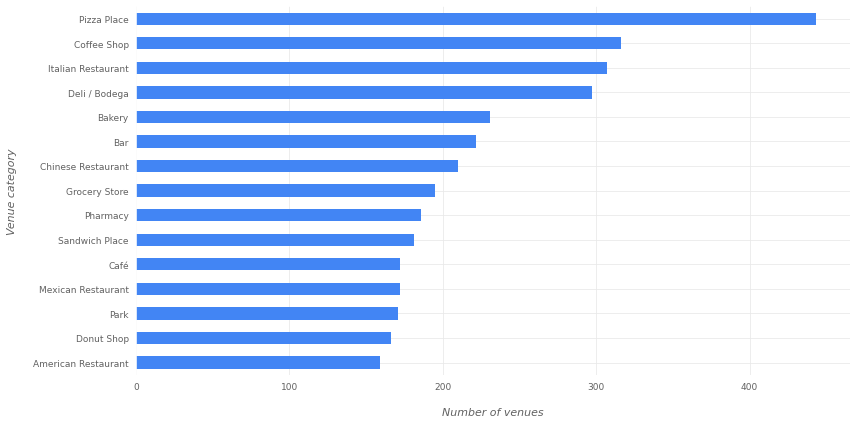

In [689]:
fig, ax = plt.subplots(figsize=(12,6), facecolor='#ffffff')
NY_top_vc = NY_venues['Venue Category'].value_counts(normalize=False)
ax = NY_top_vc.head(15).plot(kind='barh', color= "#4285f4");
ax.invert_yaxis()

def plot_conf(ax, xlbl='', ylbl='', t=''):
    """
    This function perform operations to produce better-looking 
    visualizations
    """
    # changing the background color of the plot
    ax.set_facecolor('#ffffff')
    # modifying the ticks on plot axes
    ax.tick_params(axis='both', labelcolor='#616161', color='#ffffff')
    ax.tick_params(axis='both', which='major', labelsize=9)
    # adding a grid and specifying its color
    ax.grid(True, color='#e9e9e9')
    # making the grid appear behind the graph elements
    ax.set_axisbelow(True)
    # hiding axes
    ax.spines['bottom'].set_color('#ffffff')
    ax.spines['top'].set_color('#ffffff') 
    ax.spines['right'].set_color('#ffffff')
    ax.spines['left'].set_color('#ffffff')
    # setting the title, x label, and y label of the plot
    ax.set_title(t, fontsize=14, color='#616161', loc='left', pad=24, fontweight='bold');
    ax.set_xlabel(xlbl, labelpad=16, fontsize=11, color='#616161', fontstyle='italic');
    ax.set_ylabel(ylbl, color='#616161', labelpad=16, fontsize=11, fontstyle='italic');
    
display_format = "<h2 style='color: #b58900'>{}<span style='color: #FF91CE; font-size: 115%'>:</span></h2>"

plot_conf(ax, xlbl='Number of venues', ylbl='Venue category', t='')
plt.tight_layout()
fig.savefig('most-common-venues-New_York.png', dpi=300)

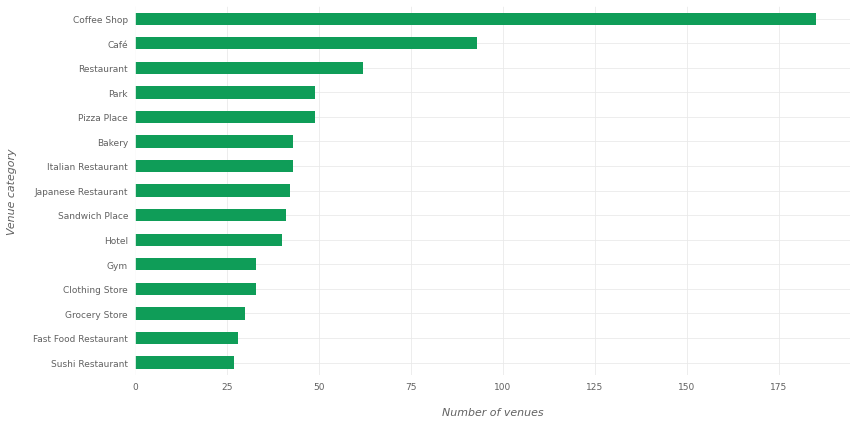

In [690]:
fig, ax = plt.subplots(figsize=(12,6), facecolor='#ffffff')
TO_top_vc = toronto_venues['Venue Category'].value_counts(normalize=False)
ax = TO_top_vc.head(15).plot(kind='barh', color= "#0f9d58");
ax.invert_yaxis()
plot_conf(ax, xlbl='Number of venues', ylbl='Venue category', t='')
plt.tight_layout()
fig.savefig('most-common-venues-Toronto.png', dpi=300)

In [691]:
NY_bot_vc = NY_venues['Venue Category'].value_counts(normalize=False)
NY_bot_vc = NY_bot_vc.tail(15).to_frame('Count')
NY_bot_vc.index.names = ['Venue Category']
NY_bot_vc

Count
Venue Category                 
Botanical Garden              1
Nightlife Spot                1
South Indian Restaurant       1
Scandinavian Restaurant       1
Kitchen Supply Store          1
Caucasian Restaurant          1
Herbs & Spices Store          1
Auto Workshop                 1
Burmese Restaurant            1
Bath House                    1
Beach Bar                     1
Design Studio                 1
Varenyky restaurant           1
Smoothie Shop                 1
College Basketball Court      1

In [692]:
TO_bot_vc = toronto_venues['Venue Category'].value_counts(normalize=False)
TO_bot_vc = TO_bot_vc.tail(15).to_frame('Count')
TO_bot_vc.index.names = ['Venue Category']
TO_bot_vc

Count
Venue Category                   
College Cafeteria               1
Strip Club                      1
Field                           1
Soccer Field                    1
German Restaurant               1
Hakka Restaurant                1
Construction & Landscaping      1
Hardware Store                  1
Golf Course                     1
Truck Stop                      1
Wings Joint                     1
College Arts Building           1
Bridal Shop                     1
Other Great Outdoors            1
College Auditorium              1

# Battle of Neighborhoods - New York and Toronto - Combined

In [693]:
only_NY_columns = set(NY_grouped.columns).difference(set(toronto_grouped.columns))
only_TO_columns = set(toronto_grouped.columns).difference(set(NY_grouped.columns))

In [694]:
NY_grouped_ = NY_grouped.copy()
NY_grouped_['Neighborhood'] = NY_grouped_['Neighborhood'].apply(lambda x: x + '_NYC')
toronto_grouped_ = toronto_grouped.copy()
toronto_grouped_['Neighborhood'] = toronto_grouped_['Neighborhood'].apply(lambda x: x + '_Toronto')

for c in only_TO_columns:
    NY_grouped_[c] = 0
for c in only_NY_columns:
    toronto_grouped_[c] = 0
    
All_columns_sorted = ['Neighborhood'] + sorted(list(NY_grouped_.drop('Neighborhood', axis=1).columns), key=str.lower)
NY_grouped_ = NY_grouped_[All_columns_sorted]
toronto_grouped_ = toronto_grouped_[all_clmns_sorted]
    
NY_TO_grouped = pd.concat([NY_grouped_, toronto_grouped_]).reset_index(drop=True)

In [695]:
NY_TO_grouped.loc[300:308,]

Neighborhood  Accessories Store  \
300                                      Yorkville_NYC                0.0   
301                                  Agincourt_Toronto                0.0   
302                     Alderwood, Long Branch_Toronto                0.0   
303  Bathurst Manor, Wilson Heights, Downsview Nort...                0.0   
304                            Bayview Village_Toronto                0.0   
305          Bedford Park, Lawrence Manor East_Toronto                0.0   
306                                Berczy Park_Toronto                0.0   
307                Birch Cliff, Cliffside West_Toronto                0.0   
308  Brockton, Parkdale Village, Exhibition Place_T...                0.0   

     Adult Boutique  Afghan Restaurant  African Restaurant  Airport  \
300             0.0                0.0                 0.0      0.0   
301             0.0                0.0                 0.0      0.0   
302             0.0                0.0                 0.0      0.0   
303             0.0                0.0                 0.0      0.0   
304             0.0                0.0                 0.0      0.0   
305             0.0                0.0                 0.0      0.0   
306             0.0                0.0                 0.0      0.0   
307             0.0                0.0                 0.0      0.0   
308             0.0                0.0                 0.0      0.0   

     Airport Food Court  Airport Lounge  Airport Service  Airport Terminal  \
300                 0.0             0.0              0.0               0.0   
301                 0.0             0.0              NaN               0.0   
302                 0.0             0.0              NaN               0.0   
303                 0.0             0.0              NaN               0.0   
304                 0.0             0.0              NaN               0.0   
305                 0.0             0.0              NaN               0.0   
306                 0.0             0.0              NaN               0.0   
307                 0.0             0.0              NaN               0.0   
308                 0.0             0.0              NaN               0.0   

     American Restaurant  Animal Shelter  Antique Shop  Aquarium  Arcade  \
300             0.000000             0.0           0.0       0.0     0.0   
301             0.000000             0.0           0.0       NaN     0.0   
302             0.000000             0.0           0.0       NaN     0.0   
303             0.000000             0.0           0.0       NaN     0.0   
304             0.000000             0.0           0.0       NaN     0.0   
305             0.043478             0.0           0.0       NaN     0.0   
306             0.000000             0.0           0.0       NaN     0.0   
307             0.000000             0.0           0.0       NaN     0.0   
308             0.000000             0.0           0.0       NaN     0.0   

     Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
300               0.0                     0.0     0.000000         0.0   
301               0.0                     0.0     0.000000         0.0   
302               0.0                     0.0     0.000000         0.0   
303               0.0                     0.0     0.000000         0.0   
304               0.0                     0.0     0.000000         0.0   
305               0.0                     0.0     0.000000         0.0   
306               0.0                     0.0     0.017544         0.0   
307               0.0                     0.0     0.000000         0.0   
308               0.0                     0.0     0.000000         0.0   

     Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
300                  0.0                   0.0              0.01   
301                  0.0                   NaN              0.00   
302                  0.0                   NaN              0.00   
303  

In [696]:
NY_TO_grouped.shape

(395, 459)

In [697]:
# obtaining the most popular categories for each neighborhood
NY_TO_neighborhoods_categories_sorted = pd.DataFrame(columns=columns)
NY_TO_neighborhoods_categories_sorted['Neighborhood'] = NY_TO_grouped['Neighborhood']

for ind in np.arange(NY_TO_grouped.shape[0]):
    NY_TO_neighborhoods_categories_sorted.iloc[ind, 1:] = return_most_common_venues(
        NY_TO_grouped.iloc[ind, :], num_top_venues)

NY_TO_neighborhoods_categories_sorted

Neighborhood  \
0                                         Allerton_NYC   
1                                         Annadale_NYC   
2                                    Arden Heights_NYC   
3                                        Arlington_NYC   
4                                         Arrochar_NYC   
5                                          Arverne_NYC   
6                                          Astoria_NYC   
7                                  Astoria Heights_NYC   
8                                       Auburndale_NYC   
9                                       Bath Beach_NYC   
10                               Battery Park City_NYC   
11                                       Bay Ridge_NYC   
12                                     Bay Terrace_NYC   
13                                      Baychester_NYC   
14                                         Bayside_NYC   
15                                       Bayswater_NYC   
16                                    Bedford Park_NYC   
17                              Bedford Stuyvesant_NYC   
18                                      Beechhurst_NYC   
19                                        Bellaire_NYC   
20                                    Belle Harbor_NYC   
21                                       Bellerose_NYC   
22                                         Belmont_NYC   
23                                     Bensonhurst_NYC   
24                                    Bergen Beach_NYC   
25                                      Blissville_NYC   
26                                      Bloomfield_NYC   
27                                     Boerum Hill_NYC   
28                                    Borough Park_NYC   
29                                    Breezy Point_NYC   
30                                       Briarwood_NYC   
31                                  Brighton Beach_NYC   
32                                   Broad Channel_NYC   
33                               Broadway Junction_NYC   
34                                       Bronxdale_NYC   
35                                Brooklyn Heights_NYC   
36                                      Brookville_NYC   
37                                     Brownsville_NYC   
38                                      Bulls Head_NYC   
39                                        Bushwick_NYC   
40                                    Butler Manor_NYC   
41                                 Cambria Heights_NYC   
42                                        Canarsie_NYC   
43                                   Carnegie Hill_NYC   
44                                 Carroll Gardens_NYC   
45                                     Castle Hill_NYC   
46                               Castleton Corners_NYC   
47                                  Central Harlem_NYC   
48                                      Charleston_NYC   
49                                         Chelsea_NYC   
50                                       Chinatown_NYC   
51                                     City Island_NYC   
52                                       City Line_NYC   
53                                    Civic Center_NYC   
54                               Claremont Village_NYC   
55                                    Clason Point_NYC   
56                                         Clifton_NYC   
57                                         Clinton_NYC   
58                                    Clinton Hill_NYC   
59                                      Co-op City_NYC   
60                                     Cobble Hill_NYC   
61                                   College Point_NYC   
62                                         Concord_NYC   
63                                       Concourse_NYC   
64                               Concourse Village_NYC   
65                                    Coney Island_NYC   
66                                          Corona_NYC   
67                                    Country Club_NYC   
68                                   Cro

### Most Common Venue Categories in both NYC and GTA

In [698]:
# fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
# NY_TO_top_vc = pd.concat([NY_venues, toronto_venues])['Venue Category'].value_counts(normalize=True) * 100
# ax = NY_TO_top_vc.head(15).plot(kind='barh', color=pc[12]);
# ax.invert_yaxis()
# plot_conf(ax, xlbl='Number of venues', ylbl='Venue category', t='')
# fig.savefig('most-common-ven-nyc-tor.png', dpi=300)

### Rare Categories in both NYC and GTA

In [699]:
NY_TO_bot_vc = pd.concat([NY_venues, toronto_venues])['Venue Category'].value_counts(normalize=False)
NY_TO_bot_vc = NY_TO_bot_vc.tail(15).to_frame('Count')
NY_TO_bot_vc.index.names = ['Venue Category']
NY_TO_bot_vc

Count
Venue Category                 
Gym Pool                      1
Puerto Rican Restaurant       1
Cafeteria                     1
Curling Ice                   1
State / Provincial Park       1
Theme Restaurant              1
Ski Area                      1
College Rec Center            1
South Indian Restaurant       1
Sri Lankan Restaurant         1
Campground                    1
Scandinavian Restaurant       1
Caucasian Restaurant          1
Cooking School                1
College Basketball Court      1

### Combined Clustering of New York and Toronto

In [701]:
# the number of clusters
kclusters = 5

NY_TO_grouped_clustering = NY_TO_grouped.drop('Neighborhood', 1)

# run k-means clustering
Combined_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NY_TO_grouped_clustering)

# check cluster labels generated for each row in the dataframe
Combined_kmeans.labels_[0:10]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [703]:
# add clustering labels
NY_TO_neighborhoods_categories_sorted.insert(0, 'Cluster Labels', Combined_kmeans.labels_)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
NY_TO_merged = NY_TO_neighborhoods_categories_sorted.set_index('Neighborhood')

NY_TO_merged.iloc[300:310] # check the last columns!

Cluster Labels  \
Neighborhood                                                         
Yorkville_NYC                                                    0   
Agincourt_Toronto                                                0   
Alderwood, Long Branch_Toronto                                   4   
Bathurst Manor, Wilson Heights, Downsview North...               4   
Bayview Village_Toronto                                          0   
Bedford Park, Lawrence Manor East_Toronto                        0   
Berczy Park_Toronto                                              0   
Birch Cliff, Cliffside West_Toronto                              0   
Brockton, Parkdale Village, Exhibition Place_To...               0   
Business reply mail Processing Centre, South Ce...               0   

                                                    1st Most Common Venue  \
Neighborhood                                                                
Yorkville_NYC                                          Italian Restaurant   
Agincourt_Toronto                                          Breakfast Spot   
Alderwood, Long Branch_Toronto                                Pizza Place   
Bathurst Manor, Wilson Heights, Downsview North...            Coffee Shop   
Bayview Village_Toronto                                Chinese Restaurant   
Bedford Park, Lawrence Manor East_Toronto              Italian Restaurant   
Berczy Park_Toronto                                           Coffee Shop   
Birch Cliff, Cliffside West_Toronto                 General Entertainment   
Brockton, Parkdale Village, Exhibition Place_To...                   Café   
Business reply mail Processing Centre, South Ce...                    Spa   

                                                        2nd Most Common Venue  \
Neighborhood                                                                    
Yorkville_NYC                                                             Gym   
Agincourt_Toronto                                   Latin American Restaurant   
Alderwood, Long Branch_Toronto                                            Pub   
Bathurst Manor, Wilson Heights, Downsview North...                       Bank   
Bayview Village_Toronto                                   Japanese Restaurant   
Bedford Park, Lawrence Manor East_Toronto                      Sandwich Place   
Berczy Park_Toronto                                              Cocktail Bar   
Birch Cliff, Cliffside West_Toronto                                      Café   
Brockton, Parkdale Village, Exhibition Place_To...                Coffee Shop   
Business reply mail Processing Centre, South Ce...                    Butcher   

                                                    3rd Most Common Venue  \
Neighborhood                                                                
Yorkville_NYC                                                         Bar   
Agincourt_Toronto                                                  Lounge   
Alderwood, Long Branch_Toronto                                Coffee Shop   
Bathurst Manor, Wilson Heights, Downsview North...             Restaurant   
Bayview Village_Toronto                                              Café   
Bedford Park, Lawrence Manor East_Toronto                     Coffee Shop   
Berczy Park_Toronto                                              Pharmacy   
Birch Cliff, Cliffside West_Toronto                       College Stadium   
Brockton, Parkdale Village, Exhibition Place_To...  Performing Arts Venue   
Business reply mail Processing Centre, South Ce...          Garden Center   

                                                   4th Most Common Venue  \
Neighborhood                                                               
Yorkville_NYC                                                Coffee Shop   
Agincourt_Toronto                                           Skating Rink   
Alderwood, Long Branch_Toronto                                       Gym   
Bathurst

**Cluster 1**

In [704]:
c1 = NY_TO_merged.loc[NY_TO_merged['Cluster Labels'] == 0, :]
print(c1.shape)
c1

(208, 11)


Cluster Labels  \
Neighborhood                                                         
Arlington_NYC                                                    0   
Arverne_NYC                                                      0   
Astoria_NYC                                                      0   
Bath Beach_NYC                                                   0   
Battery Park City_NYC                                            0   
Bay Ridge_NYC                                                    0   
Bay Terrace_NYC                                                  0   
Bayside_NYC                                                      0   
Bedford Stuyvesant_NYC                                           0   
Bellaire_NYC                                                     0   
Belle Harbor_NYC                                                 0   
Bensonhurst_NYC                                                  0   
Bergen Beach_NYC                                                 0   
Blissville_NYC                                                   0   
Bloomfield_NYC                                                   0   
Boerum Hill_NYC                                                  0   
Breezy Point_NYC                                                 0   
Briarwood_NYC                                                    0   
Brighton Beach_NYC                                               0   
Bushwick_NYC                                                     0   
Butler Manor_NYC                                                 0   
Carnegie Hill_NYC                                                0   
Carroll Gardens_NYC                                              0   
Central Harlem_NYC                                               0   
Chelsea_NYC                                                      0   
City Island_NYC                                                  0   
Civic Center_NYC                                                 0   
Clinton_NYC                                                      0   
Clinton Hill_NYC                                                 0   
Cobble Hill_NYC                                                  0   
Concord_NYC                                                      0   
Coney Island_NYC                                                 0   
Ditmas Park_NYC                                                  0   
Downtown_NYC                                                     0   
Dumbo_NYC                                                        0   
Dyker Heights_NYC                                                0   
East Harlem_NYC                                                  0   
East Village_NYC                                                 0   
East Williamsburg_NYC                                            0   
Egbertville_NYC                                                  0   
Eltingville_NYC                                                  0   
Emerson Hill_NYC                                                 0   
Fieldston_NYC                                                    0   
Financial District_NYC                                           0   
Flatbush_NYC                                                     0   
Flatiron_NYC                                                     0   
Flushing_NYC                                                     0   
Fordham_NYC                                                      0   
Forest Hills_NYC                                                 0   
Fort Greene_NYC                                                  0   
Fort Hamilton_NYC                                                0   
Gowanus_NYC                                                      0   
Gramercy_NYC                                                     0   
Grasmere_NYC                                                     0   
Greenpoint_NYC                                                   0   
Greenwich Village_NYC                                         

In [705]:
c2 = NY_TO_merged.loc[NY_TO_merged['Cluster Labels'] == 1, :]
print(c2.shape)
c2

(73, 11)


Cluster Labels  \
Neighborhood                                                         
Auburndale_NYC                                                   1   
Baychester_NYC                                                   1   
Broadway Junction_NYC                                            1   
Cambria Heights_NYC                                              1   
Canarsie_NYC                                                     1   
Chinatown_NYC                                                    1   
City Line_NYC                                                    1   
Claremont Village_NYC                                            1   
Concourse_NYC                                                    1   
Country Club_NYC                                                 1   
Cypress Hills_NYC                                                1   
East Elmhurst_NYC                                                1   
East Flatbush_NYC                                                1   
East New York_NYC                                                1   
Eastchester_NYC                                                  1   
Elmhurst_NYC                                                     1   
Erasmus_NYC                                                      1   
Flatlands_NYC                                                    1   
Floral Park_NYC                                                  1   
Fox Hills_NYC                                                    1   
Fresh Meadows_NYC                                                1   
Glen Oaks_NYC                                                    1   
Graniteville_NYC                                                 1   
Grant City_NYC                                                   1   
Hillcrest_NYC                                                    1   
Hollis_NYC                                                       1   
Holliswood_NYC                                                   1   
Homecrest_NYC                                                    1   
Huguenot_NYC                                                     1   
Jamaica Hills_NYC                                                1   
Kensington_NYC                                                   1   
Laurelton_NYC                                                    1   
Lefrak City_NYC                                                  1   
Longwood_NYC                                                     1   
Manor Heights_NYC                                                1   
Morrisania_NYC                                                   1   
Mott Haven_NYC                                                   1   
Mount Eden_NYC                                                   1   
Mount Hope_NYC                                                   1   
New Lots_NYC                                                     1   
Olinville_NYC                                                    1   
Parkchester_NYC                                                  1   
Pelham Gardens_NYC                                               1   
Pleasant Plains_NYC                                              1   
Prospect Park South_NYC                                          1   
Queens Village_NYC                                               1   
Remsen Village_NYC                                               1   
Richmond Valley_NYC                                              1   
Rochdale_NYC                                                     1   
Rosedale_NYC                                                     1   
Rugby_NYC                                                        1   
Soundview_NYC                                                    1   
South Jamaica_NYC                                                1   
South Ozone Park_NYC                                             1   
Springfield Gardens_NYC                                          1   
Spuyten Duyvil_NYC                                            

In [706]:
c3 = NY_TO_merged.loc[NY_TO_merged['Cluster Labels'] == 2, :]
print(c3.shape)
c3

(13, 11)


Cluster Labels  \
Neighborhood                                                         
Clason Point_NYC                                                 2   
Somerville_NYC                                                   2   
Todt Hill_NYC                                                    2   
Caledonia-Fairbanks_Toronto                                      2   
East Toronto, Broadview North (Old East York)_T...               2   
Lawrence Park_Toronto                                            2   
Milliken, Agincourt North, Steeles East, L'Amor...               2   
Moore Park, Summerhill East_Toronto                              2   
North Park, Maple Leaf Park, Upwood Park_Toronto                 2   
Old Mill South, King's Mill Park, Sunnylea, Hum...               2   
Parkwoods_Toronto                                                2   
Rosedale_Toronto                                                 2   
York Mills West_Toronto                                          2   

                                                         1st Most Common Venue  \
Neighborhood                                                                     
Clason Point_NYC                                                          Park   
Somerville_NYC                                                            Park   
Todt Hill_NYC                                                             Park   
Caledonia-Fairbanks_Toronto                                               Park   
East Toronto, Broadview North (Old East York)_T...                        Park   
Lawrence Park_Toronto                                         Business Service   
Milliken, Agincourt North, Steeles East, L'Amor...                        Park   
Moore Park, Summerhill East_Toronto                                     Lawyer   
North Park, Maple Leaf Park, Upwood Park_Toronto    Construction & Landscaping   
Old Mill South, King's Mill Park, Sunnylea, Hum...              Breakfast Spot   
Parkwoods_Toronto                                            Food & Drink Shop   
Rosedale_Toronto                                                          Park   
York Mills West_Toronto                                      Convenience Store   

                                                   2nd Most Common Venue  \
Neighborhood                                                               
Clason Point_NYC                                           Boat or Ferry   
Somerville_NYC                                               Yoga Studio   
Todt Hill_NYC                                                Yoga Studio   
Caledonia-Fairbanks_Toronto                                Women's Store   
East Toronto, Broadview North (Old East York)_T...     Convenience Store   
Lawrence Park_Toronto                                               Park   
Milliken, Agincourt North, Steeles East, L'Amor...          Intersection   
Moore Park, Summerhill East_Toronto                                 Park   
North Park, Maple Leaf Park, Upwood Park_Toronto                    Park   
Old Mill South, King's Mill Park, Sunnylea, Hum...                  Park   
Parkwoods_Toronto                                                   Park   
Rosedale_Toronto                                              Playground   
York Mills West_Toronto                                             Park   

                                                   3rd Most Common Venue  \
Neighborhood                                                               
Clason Point_NYC                                           Grocery Store   
Somerville_NYC                                            Duty-free Shop   
Todt Hill_NYC                                             Duty-free Shop   
Caledonia-Fairbanks_Toronto                                         Pool   
East Toronto, Broadview North (Old East York)_T...          Intersection   
Lawrence Park_Toronto                                        Swim School   
Milliken, Agincourt N

In [707]:
c4 = NY_TO_merged.loc[NY_TO_merged['Cluster Labels'] == 3, :]
print(c4.shape)
c4

(3, 11)


Cluster Labels 1st Most Common Venue  \
Neighborhood                                                        
Bayswater_NYC                             3            Playground   
Edenwald_NYC                              3            Playground   
Scarborough Village_Toronto               3            Playground   

                            2nd Most Common Venue  \
Neighborhood                                        
Bayswater_NYC                  Falafel Restaurant   
Edenwald_NYC                          Supermarket   
Scarborough Village_Toronto           Yoga Studio   

                                   3rd Most Common Venue  \
Neighborhood                                               
Bayswater_NYC                Eastern European Restaurant   
Edenwald_NYC                               Grocery Store   
Scarborough Village_Toronto                      Factory   

                            4th Most Common Venue  \
Neighborhood                                        
Bayswater_NYC                 Egyptian Restaurant   
Edenwald_NYC                          Yoga Studio   
Scarborough Village_Toronto        Duty-free Shop   

                                   5th Most Common Venue  \
Neighborhood                                               
Bayswater_NYC                          Electronics Store   
Edenwald_NYC                                     Factory   
Scarborough Village_Toronto  Eastern European Restaurant   

                            6th Most Common Venue 7th Most Common Venue  \
Neighborhood                                                              
Bayswater_NYC                 Empanada Restaurant    English Restaurant   
Edenwald_NYC                  Egyptian Restaurant     Electronics Store   
Scarborough Village_Toronto     Electronics Store   Empanada Restaurant   

                             8th Most Common Venue 9th Most Common Venue  \
Neighborhood                                                               
Bayswater_NYC                Entertainment Service           Escape Room   
Edenwald_NYC                   Empanada Restaurant    English Restaurant   
Scarborough Village_Toronto  Entertainment Service  Ethiopian Restaurant   

                            10th Most Common Venue  
Neighborhood                                        
Bayswater_NYC                 Ethiopian Restaurant  
Edenwald_NYC                 Entertainment Service  
Scarborough Village_Toronto          Event Service

In [708]:
c5 = NY_TO_merged.loc[NY_TO_merged['Cluster Labels'] == 4, :]
print(c5.shape)
c5

(98, 11)


Cluster Labels  \
Neighborhood                                                         
Allerton_NYC                                                     4   
Annadale_NYC                                                     4   
Arden Heights_NYC                                                4   
Arrochar_NYC                                                     4   
Astoria Heights_NYC                                              4   
Bedford Park_NYC                                                 4   
Beechhurst_NYC                                                   4   
Bellerose_NYC                                                    4   
Belmont_NYC                                                      4   
Borough Park_NYC                                                 4   
Broad Channel_NYC                                                4   
Bronxdale_NYC                                                    4   
Brooklyn Heights_NYC                                             4   
Brookville_NYC                                                   4   
Brownsville_NYC                                                  4   
Bulls Head_NYC                                                   4   
Castle Hill_NYC                                                  4   
Castleton Corners_NYC                                            4   
Charleston_NYC                                                   4   
Clifton_NYC                                                      4   
Co-op City_NYC                                                   4   
College Point_NYC                                                4   
Concourse Village_NYC                                            4   
Corona_NYC                                                       4   
Crown Heights_NYC                                                4   
Dongan Hills_NYC                                                 4   
Douglaston_NYC                                                   4   
East Tremont_NYC                                                 4   
Edgemere_NYC                                                     4   
Edgewater Park_NYC                                               4   
Elm Park_NYC                                                     4   
Far Rockaway_NYC                                                 4   
Forest Hills Gardens_NYC                                         4   
Fulton Ferry_NYC                                                 4   
Georgetown_NYC                                                   4   
Gerritsen Beach_NYC                                              4   
Glendale_NYC                                                     4   
Gravesend_NYC                                                    4   
Great Kills_NYC                                                  4   
Greenridge_NYC                                                   4   
Heartland Village_NYC                                            4   
High  Bridge_NYC                                                 4   
Highland Park_NYC                                                4   
Kew Gardens_NYC                                                  4   
Kew Gardens Hills_NYC                                            4   
Kingsbridge_NYC                                                  4   
Lindenwood_NYC                                                   4   
Madison_NYC                                                      4   
Manhattan Terrace_NYC                                            4   
Marine Park_NYC                                                  4   
Mariner's Harbor_NYC                                             4   
Maspeth_NYC                                                      4   
Melrose_NYC                                                      4   
Middle Village_NYC                                               4   
Midwood_NYC                                                      4   
Mill Basin_NYC                                                

In [709]:
cluster_categories = []
clusters = [c1, c2, c3, c4, c5]
for i, clus in enumerate(clusters):
    cluster_categories.append([])
    for n in clus.index.values:
        if n.endswith('NYC'):
            nn = n[:-4]
            cluster_categories[i].extend(list(NY_venues[NY_venues['Neighborhood'] == nn]['Venue Category'].values))
        else:
            nn = n[:-8]
            cluster_categories[i].extend(list(toronto_venues[toronto_venues['Neighborhood'] == nn]['Venue Category'].values))
    cluster_categories[i] = pd.Series(cluster_categories[i]).value_counts(normalize=True) * 100

In [710]:
table_color = "#363636"
table_header_color = "#363636"
tabl_txt_color = "#BBBBBB"

styles = [
    dict(selector="td", props=[("border", "0px solid #333"), ("padding", "8px 20px 8px 20px"), 
                               ("background", tbl_bck), ("text-align", "left"),
                               ("color", tbl_txt), ("font-size", "10pt")]),
    
    dict(selector="th", props=[("border", "0px solid #333"), ("padding", "8px 20px 8px 20px"), 
                               ("background", tbl_bck), ("text-align", "left"),
                               ("color", tbl_txt), ("font-size", "10pt")]),
    
    dict(selector=".col0", props=[("border-left", "1px solid #bbbbbb")]), 
    
    dict(selector="th.blank:nth-child(2)", props=[("border-left", "1px solid #bbbbbb")]),
    
    dict(selector="thead tr:nth-child(2) th", props=[("padding-top", "0"), ("padding-bottom", "8px")]),
    
    dict(selector="th.col_heading", props=[("background", tbl_hdr_bck), 
                                           ("color", "#FFCA91")]),
    
    dict(selector="th.index_name", props=[("background", tbl_hdr_bck), 
                                          ("color", "#8DCDFF")]),
    
    dict(selector="th.blank", props=[("background", tbl_hdr_bck), ("padding", "0")]),
    
    dict(selector="tr:nth-child(2n)", props=[("background", "white")]),
    
    dict(selector="thead tr:nth-child(2) th", props=[("border-bottom", "1px solid {}".format(tbl_txt))]),
    
    dict(selector="thead tr:nth-child(1) th", props=[("padding-top", "14px !important")]),
    
    dict(selector="tbody tr:last-child td", props=[("padding-bottom", "20px")]),
    
    dict(selector="tbody tr:last-child th", props=[("padding-bottom", "20px")]),
    
    dict(selector="td:hover", props=[("font-weight", "bold"), ("background", "#002b36"), ("color", "#8DCDFF")]),
]

In [731]:
for i in range(kclusters):
    c__ = cluster_categories[i].to_frame("% of venues")
    c__.index.names = ['Category']
    html = (c__.head(7).style.set_table_styles(styles)
            .set_table_attributes('style="border-collapse: collapse; border: 2px solid #BBBBBB"'))
    display(HTML(display_format.format("Cluster {}".format(i+1))))
    display(html)

In [712]:
n_counts = []
for c in clusters:
    nyc_c = 0
    tor_c = 0
    for n in c.index.values:
        if n.endswith('NYC'):
            nyc_c += 1
        else:
            tor_c += 1
    n_counts.append((nyc_c, tor_c))

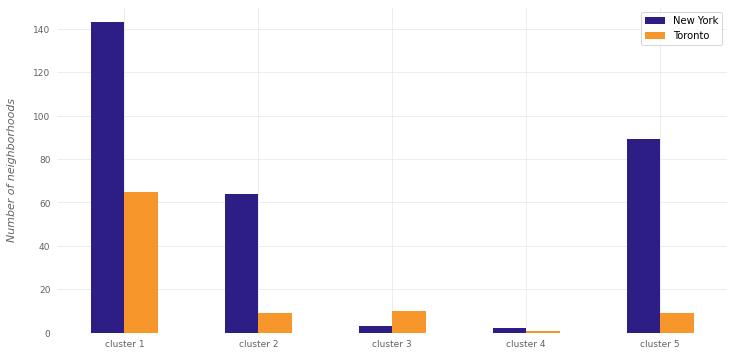

In [713]:
ind = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5']
city_c_df = pd.DataFrame({
    'New York': [x[0] for x in n_counts],
    'Toronto': [x[1] for x in n_counts]
}, index = ind)

fig, ax = plt.subplots(figsize=(12,6), facecolor='#ffffff')
city_c_df.plot(kind='bar', color=['#2d1e86', '#f6962b'], rot=0, ax=ax)
plot_conf(ax, xlbl='', ylbl='Number of neighborhoods', t='')
fig.savefig('city-count.png', dpi=300)

# END! I hope you liked the work!